In [1]:
from gather_analysis_helper import *
from twitter_no_rl_tool import *
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [2]:
def print_tweets_from_counter(cnt, num, offset=0):
    gather = num + offset
    snl = [x for x, c in cnt.most_common(gather)]
    snl = snl[offset:]
    for sn in snl:
        if sn in sn_twid:
            twidl = sn_twid[sn]
            tw = None
            tries = 0
            while tw == None and tries < 5:
                rtwid = random.choice(list(twidl))
                url = twid_url[rtwid]
                tw = Tweet(url)
                tries += 1
            display(tw)

In [3]:
save_data = False
num_plots = 5
plot_timespan = 3 * 24
num_counters = 20

In [4]:
dirname = "analysis_live"
if not os.path.exists(dirname):
    os.makedirs(dirname)

In [5]:
analysis_span = plot_timespan
current_unix = get_utc_unix_time()
start_time = unix_time_to_readable(current_unix - (3600*analysis_span))
end_time = unix_time_to_readable(current_unix + (3600*3))

#start_time = "2017-01-01 00:00:00"
#end_time = "2022-01-01 00:00:00"

print("Start time: " + start_time)
print("End time: " + end_time)


Start time: 2019-11-27 21:56:59
End time: 2019-12-01 00:56:59


In [6]:
raw = make_file_iterator(start_time, end_time, os.path.join("data/raw.json"))
full = get_counters_and_interactions2(raw)

Creating iterator from: 2019-11-27 21:56:59 to: 2019-12-01 00:56:59
Count: 100000
Count: 200000
Count: 300000
Count: 400000
Count: 500000
Count: 600000
Count: 700000
Processed 715402 tweets.
Found 245754 users.
Found 88 susp_users.
Found 6036 hashtags.
Found 6682 urls.
Found 653 domains.
Found 1 sources.
Found 245751 amplifiers.
Found 10725 influencers.
Found 98180 repliers.
Found 1647 replied_to.
Found 122 quoted.
Found 28441 quoters.
Found 564 retweeted.
Found 165572 retweeters.
Found 9271 mentioned.
Found 245751 mentioners.
Found 6143 original tweets.
Found 134 suspicious tweets.
Found 0 suspicious original tweets.
Found 9733 retweets.
Found 38788 quote tweets.
Found 240061 replies.
Found 246043 user details.


In [7]:
uf = full["user_fields"]
counters = full["counters"]
users = counters["users"]
sn_rsn = full["sn_rsn"]
rsn_sn = full["rsn_sn"]
sn_rep = full["sn_rep"]
rep_sn = full["rep_sn"]
sn_men = full["sn_men"]
men_sn = full["men_sn"]
sn_quo = full["sn_quo"]
quo_sn = full["quo_sn"]
rsn_twid = full["rsn_twid"]
twid_count = full["twid_count"]
twid_rt_count = full["twid_rt_count"]
twid_text = full["twid_text"]
twid_url = full["twid_url"]
twid_sn = full["twid_sn"]
sn_twid = full["sn_twid"]
sn_details = full["sn_details"]
sn_hashtag = full["sn_hashtag"]
hashtag_sn = full["hashtag_sn"]
hashtag_twid = full["hashtag_twid"]
orig_twids = full["orig_twids"]
replied_twids = full["replied_twids"]
quoted_twids = full["quoted_twids"]
retweeted_twids = full["retweeted_twids"]

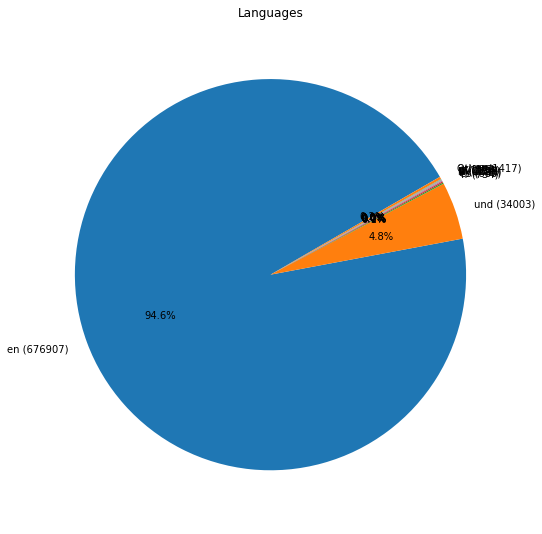

In [8]:
# Show language distribution
cluster_hts = counters["lang"]

plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 10
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append(ht + " (" + str(counters["lang"][ht]) + ")")
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(12,7))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Languages")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.show()

In [9]:
collect_start = unix_time_to_readable(full["oldest"])
collect_end = unix_time_to_readable(full["newest"])
print("Collection started on " + collect_start + " and ended on " + collect_end)

timespan_s = full["timespan"]
timespan_h = timespan_s/3600
timespan_d = timespan_h/24
high_vol = timespan_d*40
print("Collection duration: " + "%.2f"%timespan_d + " days.")

Collection started on 2019-11-28 10:25:26 and ended on 2019-11-30 22:03:20
Collection duration: 2.48 days.


Text(0.5, 1.0, 'Activity over the last 72 hours.')

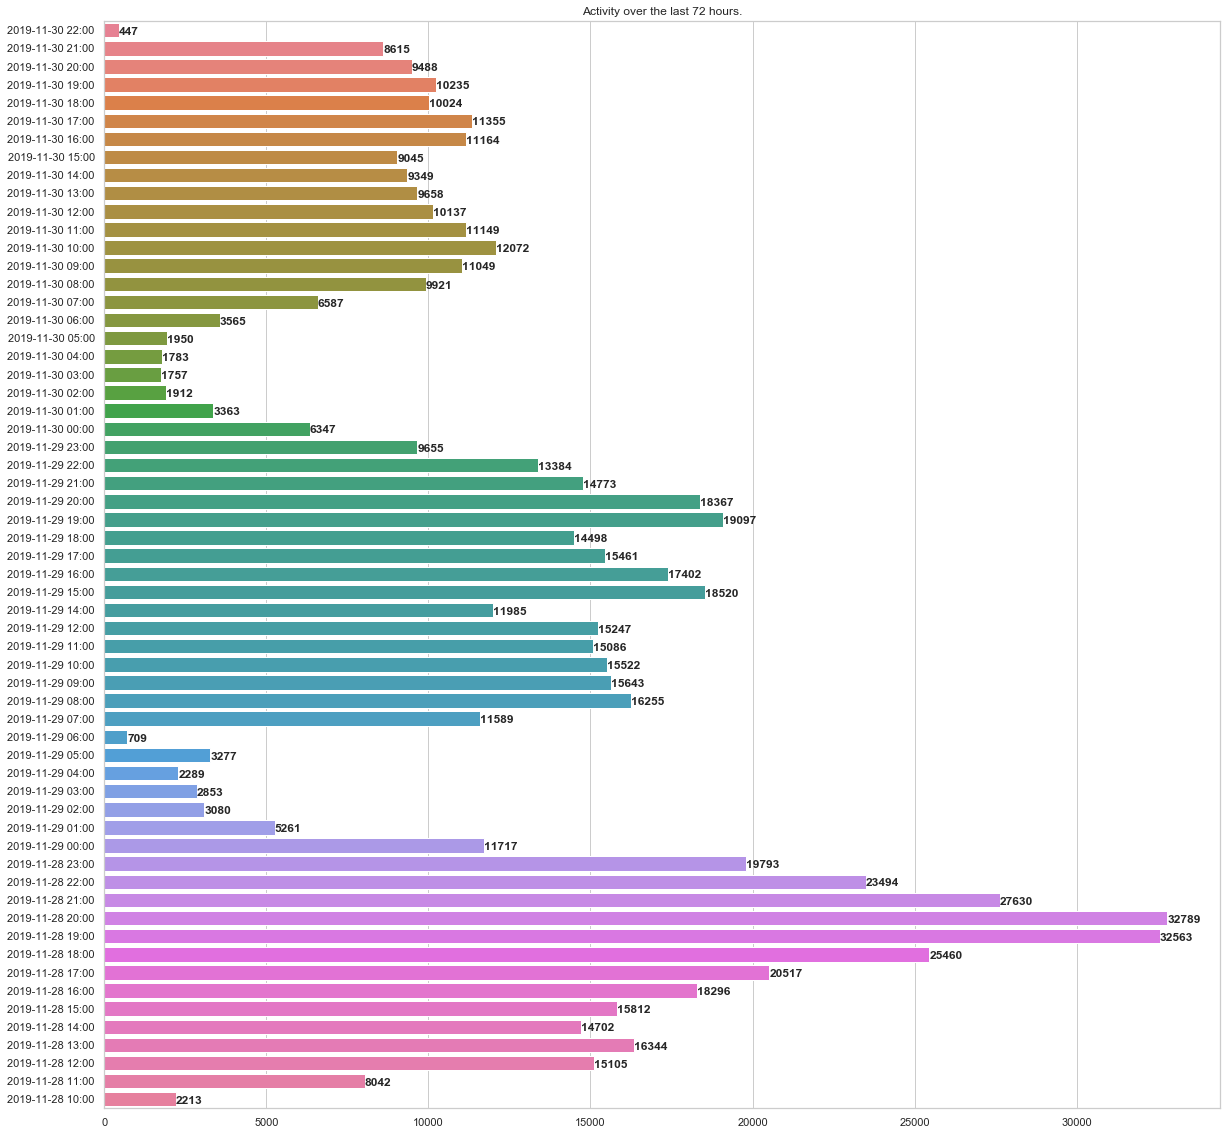

In [10]:
# Plot recent activity within the collected data (tweets per hour)
num_hours = analysis_span
plot_data = full["ts_data"]
plot_data = trim_plot_data(plot_data, 0, num_hours)
height = len(plot_data["count"])/3
sns.set(rc={'figure.figsize':(20,height)})
sns.set(style="whitegrid")
plt.figure()
ax = sns.barplot(y="time", x="count", palette="husl", data=plot_data)
for i, v in enumerate(plot_data["count"]):
    ax.text(v+1, i+0.25, str(v), fontweight='bold')
ax.set_title("Activity over the last " + str(num_hours) + " hours.")

In [11]:
# Here, I save some of the data in a format that gephi can eat
save_csv(sn_rsn, os.path.join(dirname, "retweet_interactions.csv"))
save_csv(sn_rep, os.path.join(dirname, "reply_interactions.csv"))
save_csv(sn_men, os.path.join(dirname, "mention_interactions.csv"))
save_csv(sn_quo, os.path.join(dirname, "quote_interactions.csv"))
save_json(sn_rsn, os.path.join(dirname, "sn_rsn.json"))
save_json(rsn_sn, os.path.join(dirname, "rsn_sn.json"))
save_json(counters["retweeters"], os.path.join(dirname, "retweeters.json"))
save_json(counters["retweeted"], os.path.join(dirname, "retweeted.json"))

In [12]:
# This function just prints some statistics about the dataset
print_counters(counters, uf, 50)


users (245754)
---------
1042	https://twitter.com/DailyMirror
924	https://twitter.com/Independent
882	https://twitter.com/JohnsonKid8
823	https://twitter.com/TheSun
679	https://twitter.com/Daily_Express
599	https://twitter.com/guardian
479	https://twitter.com/Mevis25988747
410	https://twitter.com/EUVoteLeave23rd
383	https://twitter.com/JasonJa97874161
349	https://twitter.com/SkyNews
318	https://twitter.com/MailOnline
316	https://twitter.com/bonker99
315	https://twitter.com/Bulldog665
296	https://twitter.com/jackson_emy
295	https://twitter.com/Shamils18
268	https://twitter.com/SerendipitySays
245	https://twitter.com/guardiannews
237	https://twitter.com/TheGreenParty
236	https://twitter.com/BananaPlant
234	https://twitter.com/DailyMailUK
229	https://twitter.com/Wagner54376206
228	https://twitter.com/ana_captures
222	https://twitter.com/Telegraph
222	https://twitter.com/ManMitchin
215	https://twitter.com/Ray42827150
207	https://twitter.com/3_newland
198	https://twitter.com/Kardo1K1kkkard

9	https://twitter.com/TrevorR17385782
9	https://twitter.com/mjc_cook
9	https://twitter.com/Diasubaldo
9	https://twitter.com/paddydocherty
9	https://twitter.com/theSNP
9	https://twitter.com/SandraDunn1955
9	https://twitter.com/malgratdemar
9	https://twitter.com/curiocat13
9	https://twitter.com/raycasey2003
9	https://twitter.com/Robbo20769
9	https://twitter.com/gmgd1971
9	https://twitter.com/nancyholiday
9	https://twitter.com/martinjdwareham
9	https://twitter.com/jenengl
9	https://twitter.com/andykillingback
9	https://twitter.com/BJ_Gardener
9	https://twitter.com/CSOL14441
9	https://twitter.com/tm014d1009
9	https://twitter.com/snowmoonshadow
9	https://twitter.com/ElaineCarter123
9	https://twitter.com/michaelcomley1
9	https://twitter.com/mascord
9	https://twitter.com/amandajs11
9	https://twitter.com/Webberc5Webber
9	https://twitter.com/AlfieTurner2

retweeted (564)
---------
116050	https://twitter.com/jeremycorbyn
30897	https://twitter.com/Channel4News
21408	https://twitter.com/BorisJohns

638198	the
469238	rt
275449	this
239771	to
170919	boris
166706	we
158679	if
132914	is
130798	you
128402	and
127185	of
113865	these
103418	he
97633	for
92646	on
91663	our
85140	in
82967	two
77614	labour
69529	sir
65499	that
65455	it
64655	watch
61700	my
59037	london
58733	will
57660	people
57423	want
56362	was
54773	are
54011	what
53083	tonight
51382	not
50406	thank
50025	johnson
48357	can
45516	when
44729	why
44172	take
40885	has
40386	back
39516	so
38597	it's
38168	have
37490	do
36472	be
35697	but
35541	how
34370	by
33505	says

2-grams (437240)
---------
129274	this is
125587	boris johnson
89832	the best
74444	the billionaire
69804	these two
69274	if was
58423	sir david
46719	london bridge
45975	want to
44098	of the
41345	he was
38183	thank you
37218	two billionaire
35083	we can
33196	the nhs
32792	people will
24877	complete lack
24835	pathetic if
24016	if we
23833	on the
22911	labour will
22727	this election
22117	take the
21949	my heart
21319	tonight we
20357	shocking reports
20200	

In [13]:
print_sn_counter(counters["susp_users"], 40)

12	https://twitter.com/Whtrslugcaviie1
7	https://twitter.com/madmoys
7	https://twitter.com/News_VJ
6	https://twitter.com/HarpoCanTalk
5	https://twitter.com/TheGraveside
5	https://twitter.com/PandaScottish
4	https://twitter.com/GranvillesYork
4	https://twitter.com/Xenopussy
3	https://twitter.com/VoteYoumatter
2	https://twitter.com/MAALADPH
2	https://twitter.com/BobSingleton_59
2	https://twitter.com/TrutherbotPyrat
2	https://twitter.com/stopthecoup1
2	https://twitter.com/freemarketing17
2	https://twitter.com/VoteLabour12Dec
2	https://twitter.com/Christ_Peter2nd
2	https://twitter.com/kevinfins13
2	https://twitter.com/UKGeneralElect2
2	https://twitter.com/Greekboy8
2	https://twitter.com/bjonas1231
2	https://twitter.com/AlooTikkii
2	https://twitter.com/Scoscarwood
2	https://twitter.com/GorgonsonnSon
1	https://twitter.com/gardenjardinage
1	https://twitter.com/Caomhin08
1	https://twitter.com/suchan104
1	https://twitter.com/KangarooCaught
1	https://twitter.com/nickrenn2
1	https://twitter.com/l

In [14]:
for twid in full["susp_twids"]:
    text = twid_text[twid]
    url = twid_url[twid]
    print(twid + "\t" + text + "\t" + url)

1200442772127453189	@GuidoFawkes #Guidofawkes #londonbridge #Jeremycorbyn #commentary #londonbridgePropaganda #NHSpropaganda #igiveUp	https://twitter.com/Whtrslugcaviie1/status/1200442772127453189
1200511603692752896	@theSNP @NicolaSturgeon #youdonthand #lifesentences #onthe #ScottishNHS #because #they #Are #immigrants… https://t.co/n725zB6jfC	https://twitter.com/Whtrslugcaviie1/status/1200511603692752896
1200174972049731590	@LBC @talkRADIO @BorisJohnson #Brexit #FBPE #r4today #Brexit @GMB @vicderbyshire #bbcpm #Newsnight #wato… https://t.co/M2yBHjA8C5	https://twitter.com/PandaScottish/status/1200174972049731590
1200863913379844101	@jeremycorbyn #Solidarity #ChangeIsComing #JC4PM #IStandWithCorbyn #VoteLabour2019 #VoteLabourDecember12 #VoteLabour https://t.co/f0riVIRsc5	https://twitter.com/GorgonsonnSon/status/1200863913379844101
1200143769875734528	@BorisJohnson #BackBoris #VoteConservative #GetBrexitDone #NeverCorbyn #LabourLies #carcrashcorbyn	https://twitter.com/madmoys/status/1200

1200016734264135680	@BBCPolitics @bbclaurak #PoliticsLive #bbcqt #YouGovMRP #BorisTheCoward #IFS #VoteLabour2019 #ChangeTheGame… https://t.co/t0Yaupy8uI	https://twitter.com/TheGraveside/status/1200016734264135680
1200123499555237890	@BorisJohnson #LiarJohnson #ToryLies #GetTheToriesOut #ReleaseTheRussiaReport #StopTheCoup #ShortCummings	https://twitter.com/andyscrane/status/1200123499555237890
1200042151918350342	@BBCPolitics @bbclaurak #NHSForSale #bbcimpartiality #YouGovMRP #CowardlyJohnson #r4today #PoliticsLive #newsnight… https://t.co/Y87xXUkY8s	https://twitter.com/TheGraveside/status/1200042151918350342
1200328043425935360	@LBC @talkRADIO @BorisJohnson #Brexit #FBPE #r4today #Brexit @GMB @vicderbyshire #bbcpm #Newsnight #wato… https://t.co/SwuHX4BTLk	https://twitter.com/PandaScottish/status/1200328043425935360
1200175543058157570	@Channel4News @BonzoReport I'm getting more disturbed by this daily. Please retweet.	https://twitter.com/0degreesspain/status/1200175543058157570
120019

In [15]:
stlen =  len(full["susp_twids"])
if stlen > 0:
    for twid in random.sample(list(full["susp_twids"]), min(10, stlen)):
        url = twid_url[twid]
        display(Tweet(url))

In [16]:
print_tweets_from_counter(counters["susp_users"], 20, 0)

In [17]:
# Calculate CTM for hashtags
susp_hashtags = []
print("Hashtag                         | Count | RTC   | U     | R     | F     | C  ")
print("================================================================================")
for hashtag, total_ht in counters["hashtags"].most_common():
    if total_ht < 200:
        continue
    # 1. Calculate the average number of posts per user for an item (U)
    U = 0
    if hashtag in hashtag_sn:
        ht_post_counts = []
        for sn, c in hashtag_sn[hashtag].items():
            ht_post_counts.append(c)
        U = np.mean(ht_post_counts)
        
    # 2. Calculate the ratio of original tweets to retweets for an item (R)
    R = 0
    orig_ht_count = 0
    rt_ht_count = 0
    if hashtag in hashtag_twid:
        twid_l = [x for x, c in hashtag_twid[hashtag].items()]
        for twid in twid_l:
            if twid in retweeted_twids:
                rt_ht_count += twid_count[twid]
            else:
                orig_ht_count += twid_count[twid]
    if rt_ht_count > 0:
        R = rt_ht_count/total_ht * 100

    # 3. Calculate the percentage of posts from the top 50 users (F)
    num_top50_posts = 0
    for sn, c in hashtag_sn[hashtag].most_common(50):
        num_top50_posts += c
    F = num_top50_posts/total_ht
    
    # 4. C = R/10 + F + U
    C = R/10 + F + U

    if C > 12:
        susp_hashtags.append(hashtag)
        hashtag = "(*) " + hashtag
    
    sep = "\t"
    if len(hashtag) < 24:
        sep += "\t"
    if len(hashtag) < 16:
        sep += "\t"
    if len(hashtag) < 8:
        sep += "\t"
    msg = hashtag + sep + "|"
    msg += str(orig_ht_count) + "\t|"
    msg += str(rt_ht_count) + "\t|"
    msg += "%.2f"%U + "\t|"
    msg += "%.2f"%R + "\t|"
    msg += "%.2f"%F + "\t|"
    msg += "%.2f"%C + "\t"
    print(msg)

Hashtag                         | Count | RTC   | U     | R     | F     | C  
climatedebate			|22176	|19802	|1.53	|88.98	|0.03	|10.46	
bbcqt				|7747	|7209	|1.17	|92.79	|0.04	|10.49	
getjohnsongone			|4894	|1711	|1.14	|34.95	|0.03	|4.66	
ge2019				|4316	|1968	|1.22	|45.05	|0.08	|5.80	
standrewsday			|3600	|3571	|1.07	|99.08	|0.04	|11.02	
bbcdebate			|3108	|2829	|1.35	|90.01	|0.11	|10.47	
notforsale			|3127	|2803	|1.12	|89.55	|0.05	|10.12	
leadersdebate			|2820	|2734	|1.11	|96.85	|0.05	|10.85	
boristhecoward			|2342	|2015	|1.25	|85.74	|0.09	|9.91	
bbcimpartiality			|1970	|1656	|1.06	|84.02	|0.08	|9.55	
planfornature			|1783	|1723	|1.23	|96.42	|0.09	|10.97	
londonbridge			|1665	|1140	|1.33	|65.86	|0.19	|8.10	
votesnp				|1589	|1470	|1.34	|85.91	|0.15	|10.08	
nhs				|1527	|1163	|1.09	|75.81	|0.10	|8.77	
blackfriday			|1156	|57	|1.08	|4.83	|0.12	|1.69	
climate				|1112	|1026	|1.00	|92.18	|0.05	|10.27	
ge19				|1038	|964	|1.03	|92.51	|0.08	|10.37	
r4today				|874	|509	|1.06	|58.04	|0.11	|6.

In [18]:
susp_ht_users = Counter()
for ht in susp_hashtags:
    if ht in hashtag_sn:
        snc = hashtag_sn[ht]
        for x, c in snc.items():
            susp_ht_users[x] += c
print(len(susp_ht_users))

susp_ht_twids = Counter()
for ht in susp_hashtags:
    if ht in hashtag_twid:
        twidc = hashtag_twid[ht]
        for x, c in twidc.items():
            susp_ht_twids[x] += c
print(len(susp_ht_twids))

0
0


In [19]:
print_tweets_from_counter(susp_ht_users, 20, 0)

In [20]:
for twid, c in susp_ht_twids.most_common(20):
    text = twid_text[twid]
    url = twid_url[twid]
    print(str(c) + "\t" + twid + "\t" + text + "\t" + url)

In [21]:
if len(susp_ht_twids) > 0:
    sample_len = 10
    if len(susp_ht_twids) < sample_len:
        sample_len = len(susp_ht_twids)
    for twid in random.sample(list([x for x, c in susp_ht_twids.items()]), sample_len):
        url = twid_url[twid]
        display(Tweet(url))

Text(0.5, 1.0, 'Account ages.')

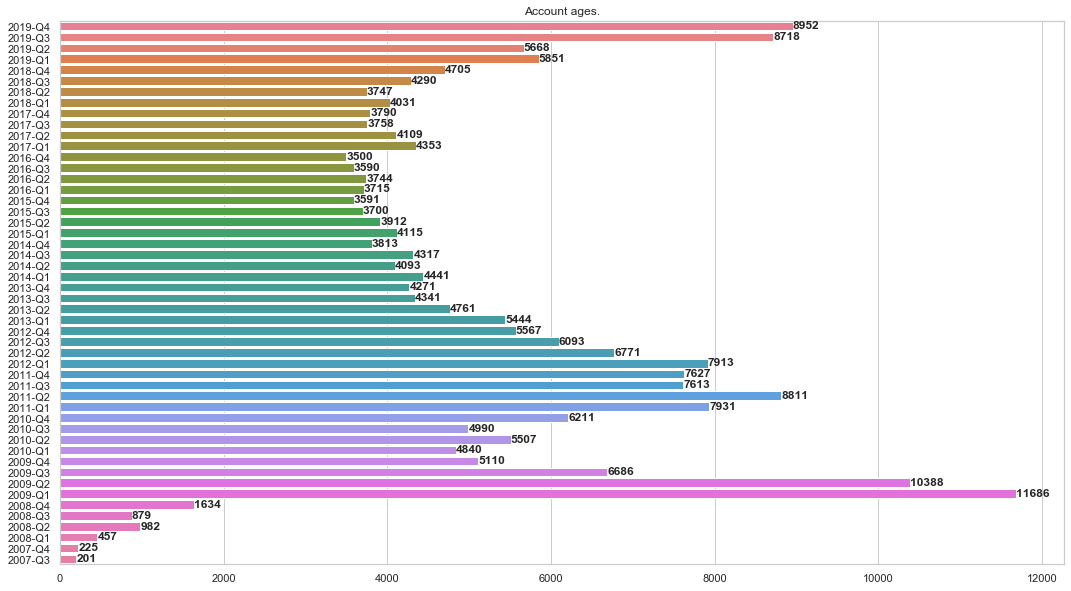

In [22]:
# Show account age distribution
all_acct_ages = Counter()
for sn, d in sn_details.items():
    if "created_at" in d:
        ca = d["created_at"]
        yr = ca[-4:]
        mon = md[ca[4:7]]
        q = ""
        for qname, qvals in quarters.items():
            if int(mon) in qvals:
                q = qname
        day = ca[8:10]
        ds = str(yr) + "-" + q
        all_acct_ages[ds] += 1
plot_data = {}
plot_data["labels"] = []
plot_data["counts"] = []
for label, count in sorted(all_acct_ages.items(), reverse=True):
    plot_data["labels"].append(label)
    plot_data["counts"].append(count)
plot_data = trim_plot_data(plot_data, 0, 50)
height = len(plot_data["counts"])/3
sns.set(rc={'figure.figsize':(20,height)})
sns.set(style="whitegrid")
fig = plt.figure(figsize=(18,10))
ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
for i, v in enumerate(plot_data["counts"]):
    pad = min(1.0, v/100)
    ax.text(v+pad, i+0.25, str(v), fontweight='bold')
ax.set_title("Account ages.")

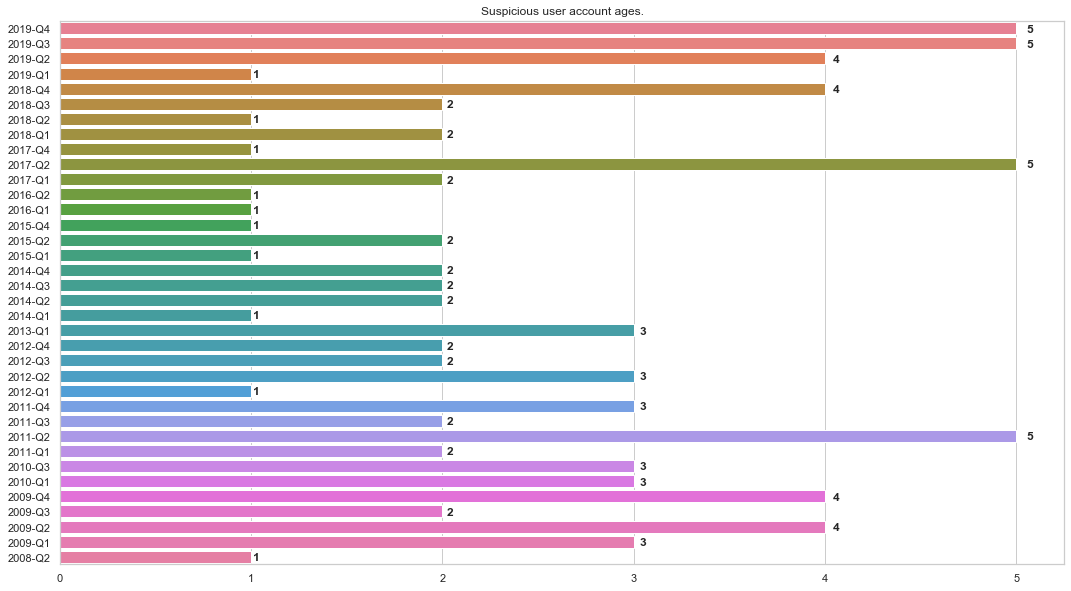

In [23]:
# Show account age distribution of suspicious users
susp_set = set([x for x, c in full["counters"]["susp_users"].most_common()])
if len(susp_set) > 0:
    all_acct_ages = Counter()
    for sn, d in sn_details.items():
        if sn not in susp_set:
            continue
        if "created_at" in d:
            ca = d["created_at"]
            yr = ca[-4:]
            mon = md[ca[4:7]]
            q = ""
            for qname, qvals in quarters.items():
                if int(mon) in qvals:
                    q = qname
            day = ca[8:10]
            ds = str(yr) + "-" + q
            all_acct_ages[ds] += 1
    plot_data = {}
    plot_data["labels"] = []
    plot_data["counts"] = []
    for label, count in sorted(all_acct_ages.items(), reverse=True):
        plot_data["labels"].append(label)
        plot_data["counts"].append(count)
    plot_data = trim_plot_data(plot_data, 0, 50)
    height = len(plot_data["counts"])/3
    sns.set(rc={'figure.figsize':(20,height)})
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18,10))
    ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
    for i, v in enumerate(plot_data["counts"]):
        pad = min(1.0, v/100)
        ax.text(v+pad, i+0.25, str(v), fontweight='bold')
    ax.set_title("Suspicious user account ages.")

In [24]:
# Show account age distribution of suspicious users
if len(susp_ht_users) > 0:
    susp_set = set([x for x, c in susp_ht_users.most_common()])
    all_acct_ages = Counter()
    for sn, d in sn_details.items():
        if sn not in susp_set:
            continue
        if "created_at" in d:
            ca = d["created_at"]
            yr = ca[-4:]
            mon = md[ca[4:7]]
            q = ""
            for qname, qvals in quarters.items():
                if int(mon) in qvals:
                    q = qname
            day = ca[8:10]
            ds = str(yr) + "-" + q
            all_acct_ages[ds] += 1
    plot_data = {}
    plot_data["labels"] = []
    plot_data["counts"] = []
    for label, count in sorted(all_acct_ages.items(), reverse=True):
        plot_data["labels"].append(label)
        plot_data["counts"].append(count)
    plot_data = trim_plot_data(plot_data, 0, 50)
    height = len(plot_data["counts"])/3
    sns.set(rc={'figure.figsize':(20,height)})
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18,10))
    ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
    for i, v in enumerate(plot_data["counts"]):
        pad = min(1.0, v/100)
        ax.text(v+pad, i+0.25, str(v), fontweight='bold')
    ax.set_title("Suspicious hashtag user account ages.")

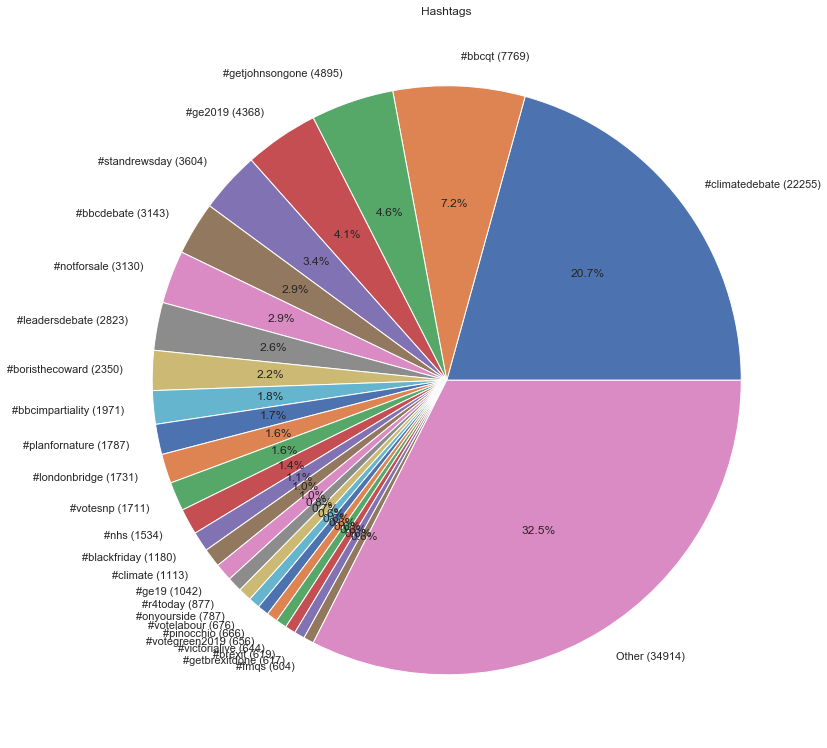

In [25]:
# Show some hashtags
cluster_hts = counters["hashtags"]

plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 25
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append("#" + ht + " (" + str(counters["hashtags"][ht]) + ")")
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Hashtags")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

In [26]:
# Show some hashtags
susp_ht_all = Counter()
for sn in susp_ht_users:
    if sn in sn_hashtag:
        for x, c in sn_hashtag[sn].items():
            susp_ht_all[x] += c
if len(susp_ht_all) > 0:
    cluster_hts = susp_ht_all

    plot_data = {}
    plot_data["labels"] = []
    plot_data["sizes"] = []

    n = 25
    other = 0
    otherc = 0
    for ht, c in cluster_hts.most_common():
        if len(plot_data["labels"]) <= n:
            plot_data["labels"].append("#" + ht + " (" + str(susp_ht_all[ht]) + ")")
            plot_data["sizes"].append(c)
        else:
            otherc += 1
            other += c
    plot_data["labels"].append("Other (" + str(other) + ")")
    plot_data["sizes"].append(other)

    fig = plt.figure(figsize=(9,5))
    ax = fig.add_axes((0,0,.5,1))
    ax.set_title("Hashtags")
    plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
    plt.axis('equal')
    plt.show()

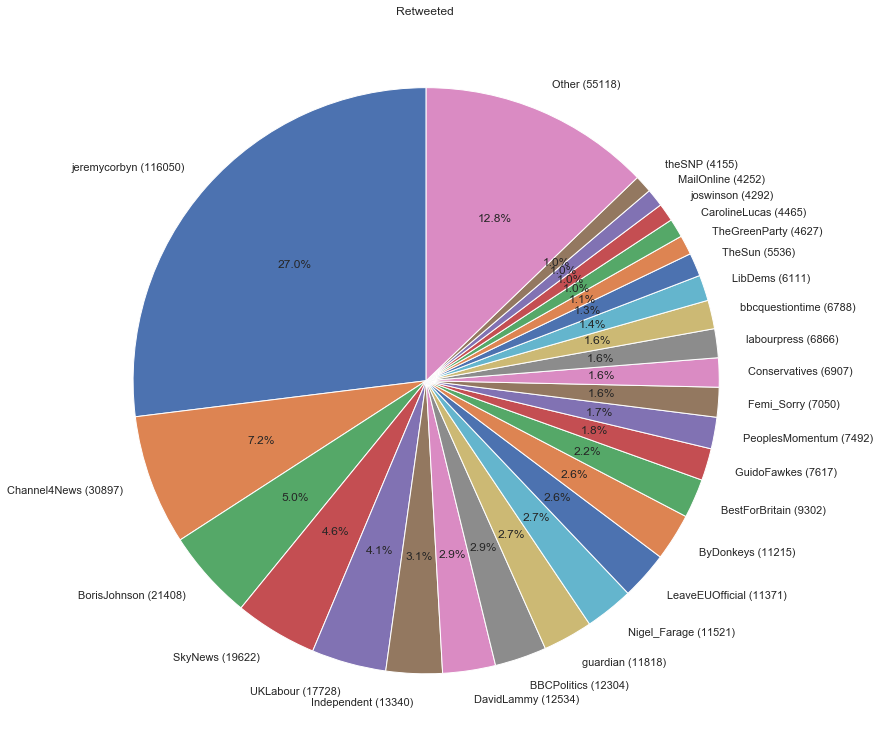

In [27]:
# Show some hashtags
cluster_hts = counters["retweeted"]

plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 25
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append(ht + " (" + str(counters["retweeted"][ht]) + ")")
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Retweeted")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

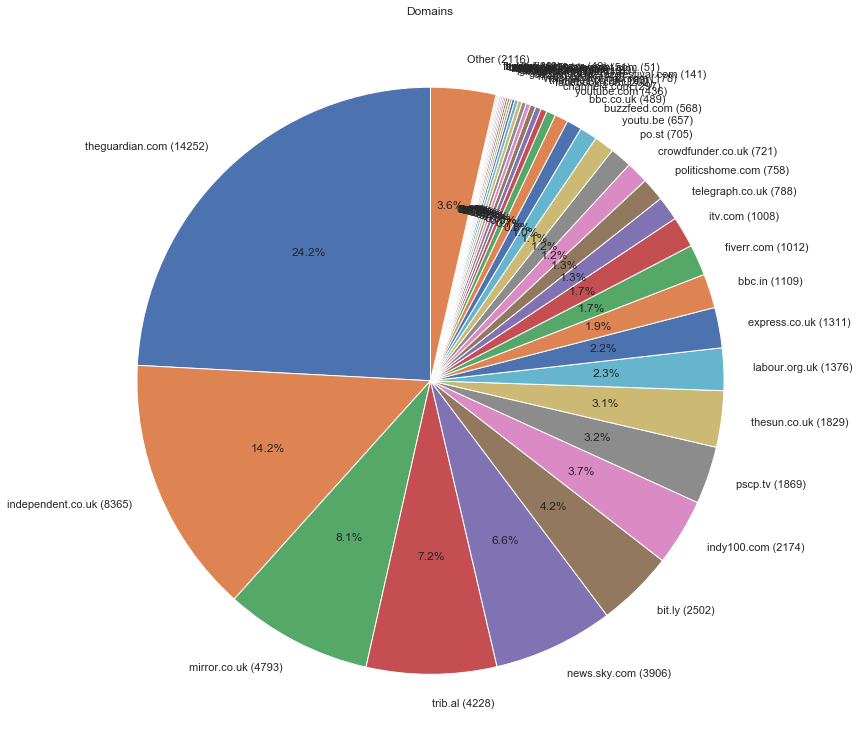

In [28]:
# Show some url domains
domains = counters["domains"]
cluster_hts = domains
plot_data = {}
plot_data["labels"] = []
plot_data["sizes"] = []

n = 40
other = 0
otherc = 0
for ht, c in cluster_hts.most_common():
    if len(plot_data["labels"]) <= n:
        plot_data["labels"].append(ht + " (" + str(counters["domains"][ht]) + ")")
        plot_data["sizes"].append(c)
    else:
        otherc += 1
        other += c
plot_data["labels"].append("Other (" + str(other) + ")")
plot_data["sizes"].append(other)

fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("Domains")
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [29]:
top_domains = [x for x, c in domains.most_common(num_plots)]
min_r = 1
dc = ""
for url_target in top_domains:
    msg = "Users that used url containing: " + url_target
    msg += " that tweeted them at least " + str(min_r) + " times"
    if len(dc) > 0:
        msg += " and whose account was created after " + dc
    msg += "."
    print(msg)
    amps = print_url_amplifiers(url_target, full,  min_retweets=min_r, date_cutoff=dc)
    print("")

Users that used url containing: theguardian.com that tweeted them at least 1 times.
Matches:
295	https://www.theguardian.com/world/2019/nov/27/jair-bolsonaro-international-criminal-court-indigenous-rights?utm_term=Autofeed&CMP=twt_gu&utm_medium=&utm_source=Twitter#Echobox=1574912252
209	https://www.theguardian.com/world/2019/nov/30/chinese-riot-police-fire-teargas-and-beat-up-protesters-in-guangdong-province?utm_term=Autofeed&CMP=twt_gu&utm_medium=&utm_source=Twitter#Echobox=1575125789
171	https://www.theguardian.com/us-news/2019/nov/29/ohio-extreme-abortion-bill-reimplant-ectopic-pregnancy?CMP=twt_gu&utm_medium=&utm_source=Twitter#Echobox=1575018221
170	https://www.theguardian.com/politics/2019/nov/28/revealed-tory-candidates-issued-with-attack-manuals-on-how-to-smear-rivals?CMP=twt_gu&utm_medium=&utm_source=Twitter#Echobox=1574943106
164	https://www.theguardian.com/games/2019/nov/29/gamers-back-under-dungeons-and-dragons-spell?utm_term=Autofeed&CMP=twt_gu&utm_medium=&utm_source=Twitt

https://twitter.com/clara_merino	(1)	| 8 k	| 370	| 705	|   | 2011-05-31 | Clara Merino
https://twitter.com/OneLag		(1)	| 97 k	| 2 k	| 4 k	|   | 2007-04-05 | Galeno Lima
https://twitter.com/ClarissaBLee	(1)	| 602	| 19 	| 175	|   | 2019-07-19 | Clarissa B Lee
https://twitter.com/SDGs_RU		(1)	| 350	| 16 	| 100	|   | 2019-08-10 | SDGs at Ritsumeikan
https://twitter.com/Luizab16		(1)	| 155 k	| 516	| 200	|   | 2013-04-16 | Luiza b
https://twitter.com/ProfAndrews		(1)	| 2 k	| 228	| 89 	|   | 2010-12-15 | Scott Andrews
https://twitter.com/DenzelScott		(1)	| 19 k	| 675	| 5 k	|   | 2011-05-30 | Denzel Scott
https://twitter.com/I_amI_amI_am	(1)	| 18 k	| 116	| 4 k	|   | 2014-05-02 | recycled star dust and borrowed energy
https://twitter.com/AmadorGalvezIII	(1)	| 49 k	| 2 k	| 5 k	|   | 2013-06-07 | Amador Galvez III
https://twitter.com/lunarowl05		(1)	| 18 k	| 877	| 2 k	|   | 2011-08-06 | Richard M Dennis
https://twitter.com/KIMO79KIMO		(1)	| 71 k	| 309	| 193	|   | 2011-02-05 | Karim
https://twitte

https://twitter.com/emilot_e		(1)	| 25 k	| 690	| 512	|   | 2010-09-12 | Emilot
https://twitter.com/BCWildfireWkly	(2)	| 75 k	| 982	| 3 k	|   | 2018-08-20 | BC Wildfire Weekly
https://twitter.com/grantbdesign	(1)	| 4 k	| 40 	| 219	|   | 2013-02-09 | Grant Barratt
https://twitter.com/nicomowarsaw	(1)	| 33 k	| 1 k	| 2 k	|   | 2009-06-18 | Nicomo Warsaw
https://twitter.com/brooklynmarie	(1)	| 132 k	| 43 k	| 15 k	|   | 2007-03-12 | Brooke Binkowski
https://twitter.com/PencoedGeog		(1)	| 4 k	| 438	| 156	|   | 2013-06-04 | Pencoed Geography
https://twitter.com/ramaderamon		(1)	| 6 k	| 180	| 403	|   | 2019-08-23 | Ramón Rama
https://twitter.com/BDuzgin		(1)	| 36 k	| 151	| 537	|   | 2008-11-01 | Bava Duzgin
https://twitter.com/Lauremari2		(1)	| 96 k	| 7 k	| 8 k	|   | 2010-07-18 | Rogue💙ICallBS💙Laure 🇺🇸
https://twitter.com/Micsquito		(1)	| 1 k	| 266	| 514	|   | 2011-03-24 | Leonidas
https://twitter.com/OGOriginalGoat	(4)	| 154 k	| 374	| 1 k	|   | 2013-03-13 | Dick Gozinya
https://twitter.com/HFo

https://twitter.com/AbleToMeditate	(6)	| 87 k	| 189	| 727	|   | 2009-04-05 | YouOnlyHaveOneSoul
https://twitter.com/Fran75GB		(3)	| 68 k	| 295	| 534	|   | 2013-11-17 | Françoise
https://twitter.com/Zonamagnetica	(3)	| 10 k	| 50 	| 230	|   | 2014-12-25 | Zonamagnetica
https://twitter.com/Judley		(1)	| 20 k	| 456	| 3 k	|   | 2008-09-12 | Judley
https://twitter.com/SukiyakiSong	(1)	| 186 k	| 3 k	| 1 k	|   | 2009-12-29 | 知足的隠遁者
https://twitter.com/tilism		(7)	| 25 k	| 184	| 1 k	|   | 2009-05-20 | Leitrim
https://twitter.com/tonyhickson21	(1)	| 1 k	| 113	| 488	|   | 2015-12-26 | TonyHickson
https://twitter.com/Vaeter		(1)	| 3 k	| 1 k	| 999	|   | 2009-01-15 | Hans-Georg Nelles
https://twitter.com/Spiritunicorn	(3)	| 65 k	| 891	| 2 k	|   | 2010-05-23 | Spiritunicorn
https://twitter.com/mauriceg88		(3)	| 240 k	| 671	| 624	|   | 2014-01-20 | Maurice Gibbons
https://twitter.com/NightingaleSaid	(1)	| 11 	| 0 	| 0 	|   | 2019-11-28 | A Nightingale Said To Me
https://twitter.com/Architarist		(1)	| 

https://twitter.com/kobiosama		(1)	| 26 k	| 200	| 802	|   | 2013-10-23 | yves saint loser
https://twitter.com/DimassamiDSH	(1)	| 38 k	| 440	| 504	|   | 2010-08-26 | ILÚVATAR
https://twitter.com/mgrrl		(1)	| 1 k	| 56 	| 315	|   | 2007-11-17 | M Grrl
https://twitter.com/CommunityParty1	(1)	| 55 k	| 3 k	| 2 k	|   | 2012-01-09 | David Samuels
https://twitter.com/rubi1605		(2)	| 9 k	| 425	| 326	|   | 2010-01-07 | Kasia Z🕊
https://twitter.com/Dana99213551	(3)	| 376	| 5 	| 44 	|   | 2019-11-19 | Dana
https://twitter.com/Joe_standing	(1)	| 14 k	| 378	| 382	|   | 2011-08-10 | Prince of Wiltshire.
https://twitter.com/loulougouv		(1)	| 4 k	| 57 	| 235	|   | 2016-02-14 | Nameless Ghoul
https://twitter.com/Mthilde_Lavigne	(1)	| 1 k	| 106	| 294	|   | 2016-09-16 | Mathilde L.
https://twitter.com/NatzeSupernatrl	(1)	| 164 k	| 1 k	| 4 k	|   | 2015-07-04 | Nad Natze SPN #FBPE
https://twitter.com/Toria_O_		(1)	| 98 	| 91 	| 885	|   | 2009-03-15 | Victoria
https://twitter.com/drmalowais		(4)	| 35 k	| 743	

https://twitter.com/AnneRose713		(1)	| 73 k	| 2 k	| 3 k	|   | 2017-02-10 | Anne Rose
https://twitter.com/tarundsnaol		(2)	| 103 k	| 270	| 4 k	|   | 2014-08-19 | tarun kaushik
https://twitter.com/ComradeLaurie	(1)	| 303	| 36 	| 123	|   | 2019-11-15 | ☭ Adam William Laurie ☭
https://twitter.com/Asifniaziipad	(2)	| 33 k	| 245	| 976	|   | 2017-12-08 | Asif
https://twitter.com/ChrisLyddon		(1)	| 49 k	| 3 k	| 4 k	|   | 2009-06-15 | Chris Lyddon #FBPE
https://twitter.com/carljokl		(2)	| 80 k	| 2 k	| 5 k	|   | 2008-09-30 | Carl #RevoteArt50 'Centralist Daddy' Jokl Esq. 🔶️
https://twitter.com/MattGP		(1)	| 2 k	| 78 	| 231	|   | 2011-05-23 | Matt Powell
https://twitter.com/aderekmccabe	(1)	| 22 k	| 415	| 419	|   | 2010-09-29 | Derek McCabe
https://twitter.com/suepeac		(1)	| 339 k	| 3 k	| 2 k	|   | 2008-12-24 | suepeac 🌈
https://twitter.com/RappholdUwe		(1)	| 10 	| 2 	| 102	|   | 2019-11-24 | Hyperriss
https://twitter.com/HowieChamberla1	(2)	| 34 k	| 449	| 1 k	|   | 2013-12-24 | Howie Chamberlain

https://twitter.com/amgahan1		(1)	| 3 k	| 62 	| 348	|   | 2009-10-16 | Anne Marie O'Brien
https://twitter.com/akalionrule		(1)	| 228 k	| 418	| 217	|   | 2009-04-25 | Zahir Ahmed
https://twitter.com/deegandeegan11	(1)	| 5 k	| 148	| 732	|   | 2011-10-26 | SHEILA DEEGAN
https://twitter.com/KG000		(2)	| 80 k	| 531	| 342	|   | 2011-02-12 | adieu au langage et le livre d'image
https://twitter.com/spudjump		(1)	| 2 k	| 145	| 376	|   | 2011-01-13 | john michael hill
https://twitter.com/JimTSelkirk		(1)	| 12 k	| 238	| 964	|   | 2011-12-12 | Jim Terras
https://twitter.com/Finchnt		(1)	| 9 k	| 337	| 1 k	|   | 2012-02-20 | Murray Schneider
https://twitter.com/thelictor		(1)	| 22 k	| 272	| 1 k	|   | 2015-10-02 | Scott Barr
https://twitter.com/shea2378		(1)	| 19 k	| 259	| 748	|   | 2009-03-11 | εïз Tammy εïз
https://twitter.com/fede_glodo		(1)	| 20 k	| 473	| 304	|   | 2010-03-29 | Federico Glodowsky
https://twitter.com/JormaVirtanen	(1)	| 55 k	| 836	| 1 k	|   | 2011-05-28 | Jorma Virtanen
https://tw

https://twitter.com/dame_keep		(1)	| 1 k	| 206	| 646	|   | 2019-11-22 | Dame Keep It Real
https://twitter.com/cpatrulescu		(1)	| 3 k	| 406	| 4 k	|   | 2009-08-09 | Ciprian Patrulescu
https://twitter.com/BadPutty		(1)	| 180 k	| 2 k	| 1 k	|   | 2013-09-15 | Bad Putty Tat
https://twitter.com/Lord_DD_Rises	(1)	| 21 k	| 207	| 972	|   | 2009-10-07 | SchwarZY
https://twitter.com/MoulazemAymen	(1)	| 1 k	| 88 	| 1 k	|   | 2017-10-20 | aymen moulazem
https://twitter.com/marikomariko	(1)	| 63 k	| 2 k	| 2 k	|   | 2009-03-29 | 福山万里子 Mariko Fukuyama
https://twitter.com/daharitonov		(1)	| 36 k	| 327	| 259	|   | 2010-12-04 | dah
https://twitter.com/tomo161382		(1)	| 8 k	| 329	| 334	|   | 2011-09-29 | 七師＠小説家になろう＆Pixiv
https://twitter.com/okadascape		(1)	| 266 k	| 1 k	| 149	|   | 2009-11-18 | yoshitada okada
https://twitter.com/karabzy		(2)	| 109 k	| 3 k	| 5 k	|   | 2011-12-13 | Karabo Tau
https://twitter.com/Penny4It		(1)	| 22 k	| 594	| 1 k	|   | 2012-11-24 | Hilary
https://twitter.com/R87655299		(1)	|

https://twitter.com/00o00oooo		(1)	| 4 k	| 416	| 1 k	|   | 2019-07-25 | Agent Zero 🕴🏻
https://twitter.com/JoniLance1		(1)	| 39 	| 4 	| 84 	|   | 2016-10-19 | Joni Lance
https://twitter.com/SpiroZaverdinos	(1)	| 558	| 84 	| 304	|   | 2011-12-25 | Spiro Zaverdinos
https://twitter.com/BrandiA41636738	(1)	| 85 	| 1 	| 36 	|   | 2019-09-17 | Brandi Alexander
https://twitter.com/HudsonKerry		(1)	| 2 k	| 763	| 658	|   | 2011-09-12 | Kerry Hudson
https://twitter.com/oladele_olusola	(1)	| 2 k	| 229	| 481	|   | 2013-09-11 | Olusola Oladele
https://twitter.com/AcWailing		(1)	| 11 k	| 3 k	| 181	|   | 2017-05-02 | Prof AC Wailing #OFUK #PARODY
https://twitter.com/JohnBWaldron	(1)	| 448	| 155	| 535	|   | 2011-01-27 | JB Waldron
https://twitter.com/Beate33219324	(1)	| 12 k	| 200	| 3 k	|   | 2018-10-09 | Beate
https://twitter.com/vix000		(1)	| 41 k	| 572	| 337	|   | 2009-07-15 | jackie
https://twitter.com/janiceisthekey	(1)	| 772	| 37 	| 120	|   | 2013-06-13 | Janice Sun
https://twitter.com/boukashef2

https://twitter.com/jeeprenegade666	(1)	| 40 k	| 990	| 1 k	|   | 2015-05-06 | Ian Andrews (Labour activist) #GTTO
https://twitter.com/nataliebole		(1)	| 35 k	| 913	| 843	|   | 2011-01-16 | nat
https://twitter.com/RalfDrift		(18)	| 805	| 7 	| 41 	|   | 2012-08-06 | Ralf Drift
https://twitter.com/PrestonParkLab	(1)	| 5 k	| 1 k	| 958	|   | 2014-05-05 | Preston Park Labour
https://twitter.com/davidlaneimages	(1)	| 19 k	| 95 	| 228	|   | 2010-07-17 | David Lane
https://twitter.com/Blandscape87	(1)	| 336	| 82 	| 175	|   | 2017-12-09 | Dr Sam Foster
https://twitter.com/LizITFC		(2)	| 2 k	| 122	| 323	|   | 2013-03-24 | Liz G
https://twitter.com/varaprasadnik	(20)	| 56 k	| 279	| 70 	|   | 2012-04-06 | ⭐Vara Prasad Nik⭐
https://twitter.com/dtlumu		(1)	| 5 k	| 1 k	| 4 k	|   | 2011-06-06 | david tash lumu
https://twitter.com/Sticklemouse	(2)	| 59 k	| 933	| 2 k	|   | 2009-08-12 | Murray Lynes #NHS Love ⚫️ 🍌🧔🏻 🇪🇺 🥄
https://twitter.com/s_lubieniecka	(1)	| 18 k	| 185	| 227	|   | 2017-01-20 | s. 👩‍🚀🎄
h

https://twitter.com/_Gerasim_		(1)	| 36 k	| 441	| 331	|   | 2010-07-09 | Герасим  ♌️
https://twitter.com/CostanzaArch	(1)	| 6 k	| 71 	| 100	|   | 2012-06-04 | George the Architect
https://twitter.com/JimmyDe96405638	(2)	| 59 k	| 180	| 235	|   | 2016-09-20 | Jimmy Dean
https://twitter.com/Mortlach1		(1)	| 50 k	| 110	| 189	|   | 2012-06-11 | Mortlach
https://twitter.com/4ndr311999		(1)	| 5 k	| 80 	| 128	|   | 2013-11-24 | flash_without_blitz
https://twitter.com/Tdkkjk		(1)	| 19 k	| 307	| 2 k	|   | 2011-09-03 | Todd Kennedy
https://twitter.com/bader100100100	(1)	| 10 k	| 774	| 2 k	|   | 2013-01-17 | Bader
https://twitter.com/minerfan_14		(1)	| 6 k	| 94 	| 524	|   | 2018-01-15 | Teo Garcia
https://twitter.com/beelee51		(1)	| 1 k	| 39 	| 87 	|   | 2012-05-25 | Brian
https://twitter.com/WillSpilsbury23	(1)	| 20 k	| 373	| 2 k	|   | 2014-09-20 | Will
https://twitter.com/brawladdie1		(1)	| 2 k	| 1 k	| 972	|   | 2019-01-12 | мad нaттer
https://twitter.com/windupmerchant3	(1)	| 543	| 48 	| 53 	| 

https://twitter.com/Candida_MKSB	(1)	| 2 k	| 43 	| 51 	|   | 2009-03-31 | Candida Middleton
https://twitter.com/Mikeo11		(1)	| 2 k	| 280	| 817	|   | 2009-02-02 | Tactical Voter FBPE 🇪🇺 🔰
https://twitter.com/supaneca		(3)	| 82 k	| 528	| 1 k	|   | 2011-01-25 | Supaneca
https://twitter.com/FranParkinson77	(2)	| 65 	| 8 	| 20 	|   | 2018-02-27 | Fran Parkinson
https://twitter.com/grifft_cymru	(1)	| 1 k	| 73 	| 332	|   | 2014-11-13 | 🌈𝚜𝚋 🏴󠁧󠁢󠁷󠁬󠁳󠁿🏴‍☠️(𝚜𝚚𝚞𝚒𝚛𝚛𝚎𝚕)
https://twitter.com/dustytrinket	(1)	| 19 k	| 359	| 3 k	|   | 2009-04-25 | now :-( was :-)
https://twitter.com/debimasseywm	(1)	| 4 k	| 809	| 839	|   | 2014-06-01 | Debi Massey
https://twitter.com/FaisalLa7if		(3)	| 12 k	| 23 	| 359	|   | 2015-11-01 | Fes
https://twitter.com/pollygarter		(1)	| 11 k	| 462	| 687	|   | 2008-11-02 | Jan Norton
https://twitter.com/tony_lall		(1)	| 3 k	| 157	| 270	|   | 2015-09-27 | Tony lall
https://twitter.com/RiyadNadwi		(1)	| 2 k	| 1 k	| 742	|   | 2009-11-21 | Sh Riyad Nadwi, PhD
https://twitter.com/wasr

https://twitter.com/Clint009		(1)	| 33 k	| 347	| 1 k	|   | 2009-07-08 | Claude B.
https://twitter.com/czernozukow		(2)	| 355	| 14 	| 263	|   | 2019-08-06 | Czernozukow
https://twitter.com/6f6e5ba6bdc34ae	(2)	| 136 k	| 1 k	| 1 k	|   | 2014-10-14 | Marshall Mckee
https://twitter.com/DjaidaouiKamal	(1)	| 12 k	| 165	| 313	|   | 2018-10-28 | Kamal كمال ⴽⴰⵎⴰⵍ 🇩🇿🇬🇧🇫🇷🇲🇹
https://twitter.com/nanyaly		(1)	| 24 k	| 362	| 1 k	|   | 2010-02-22 | Nany Aly
https://twitter.com/SebastianTomCat	(1)	| 106 k	| 3 k	| 2 k	|   | 2012-05-24 | Sebastián
https://twitter.com/LaPachamama13	(1)	| 1 k	| 12 	| 40 	|   | 2019-04-18 | La Pachamama
https://twitter.com/armfel		(1)	| 39 k	| 2 k	| 3 k	|   | 2011-01-17 | Armando Felsani
https://twitter.com/WPKat		(1)	| 91 k	| 434	| 3 k	|   | 2011-06-23 | Kathleen
https://twitter.com/merchantfarooq	(1)	| 9 k	| 1 k	| 4 k	|   | 2009-09-10 | Farooq Abdulla Merchant
https://twitter.com/Chief_Warlock7	(2)	| 11 k	| 355	| 293	|   | 2011-09-18 | Chief Warlock
https://twitter.com/rah

https://twitter.com/MargiePedersen	(1)	| 7 k	| 157	| 904	|   | 2012-03-01 | margie pedersen
https://twitter.com/_aozira12		(1)	| 15 k	| 131	| 338	|   | 2016-02-08 | aozira
https://twitter.com/KawesaLawrence	(1)	| 1 k	| 281	| 1 k	|   | 2011-09-14 | Kawesa Lawrence
https://twitter.com/tt51970410		(1)	| 12 k	| 318	| 397	|   | 2017-04-09 | tt
https://twitter.com/HaxenHammer		(3)	| 61 k	| 1 k	| 1 k	|   | 2010-02-24 | 🏳️‍🌈대뇌찌질🏳️‍⚧
https://twitter.com/sciltian		(1)	| 48 k	| 1 k	| 599	|   | 2011-05-02 | Sciltian Gastaldi
https://twitter.com/MistinguetteGr1	(3)	| 17 k	| 462	| 895	|   | 2016-07-11 | Misty Grandison
https://twitter.com/HildaRomero6	(1)	| 187 k	| 703	| 1 k	|   | 2012-04-11 | Hilda Romero
https://twitter.com/GazapoLapayese	(1)	| 9 k	| 2 k	| 489	|   | 2015-09-07 | Dr. Manuel J. Gazapo Lapayese
https://twitter.com/AbdouRakeb		(1)	| 314	| 29 	| 122	|   | 2012-11-17 | rakeb abdou
https://twitter.com/DV99999		(1)	| 40 k	| 328	| 5 k	|   | 2019-09-16 | Desi vichar
https://twitter.com/Roza

Matches:
838	https://www.mirror.co.uk/news/uk-news/london-bridge-hero-murderer-day-20994055
217	https://www.mirror.co.uk/news/uk-news/man-grabbed-5ft-narwhal-tusk-20992979
155	https://www.mirror.co.uk/news/uk-news/london-bridge-shooting-police-live-20989944
137	https://www.mirror.co.uk/news/politics/breaking-jeremy-corbyn-reveals-451-20970436
108	https://www.mirror.co.uk/news/uk-news/london-bridge-terrorist-preached-isis-20996552
65	https://www.mirror.co.uk/news/uk-news/london-bridge-terror-attack-hero-20990888
60	https://www.mirror.co.uk/news/uk-news/boris-johnson-dismisses-workers-drunk-20984876?utm_source=twitter.com&utm_medium=social&utm_campaign=sharebar
54	https://www.mirror.co.uk/news/world-news/breaking-hague-incident-multiple-injuries-20992319
47	https://www.mirror.co.uk/money/tragedy-festival-hangover-took-brothers-20882900
41	https://www.mirror.co.uk/news/world-news/single-dad-adopts-baby-down-20985737
39	https://www.mirror.co.uk/news/uk-news/breaking-london-bridge-attacker-

https://twitter.com/lhgmk2		(1)	| 191 k	| 2 k	| 2 k	|   | 2013-12-28 | Longhairedgit
https://twitter.com/_RealLemonLime	(1)	| 12 k	| 96 	| 93 	|   | 2017-01-21 | lemon lime(nickname)
https://twitter.com/AComNewsEurope	(1)	| 114	| 11 	| 239	|   | 2019-10-19 | A Com News - Europe
https://twitter.com/SaucedbySally	(1)	| 142 k	| 2 k	| 3 k	|   | 2011-03-02 | SaucedbySally
https://twitter.com/halfstreet		(1)	| 22 k	| 105	| 199	|   | 2010-09-01 | parchment
https://twitter.com/empowergracewi	(1)	| 103 k	| 11 k	| 11 k	|   | 2017-07-15 | Grace Krokosz
https://twitter.com/QueenMSheba		(10)	| 235 k	| 1 k	| 1 k	|   | 2014-06-01 | Queen M. Sheba
https://twitter.com/chess_ka_		(1)	| 3 k	| 339	| 1 k	|   | 2009-02-12 | chesska
https://twitter.com/newsfeed__2019	(1)	| 65 k	| 456	| 1 k	|   | 2017-04-12 | newsfeed
https://twitter.com/Emergency_Life	(1)	| 137 k	| 5 k	| 5 k	|   | 2015-01-15 | Emergency.Life
https://twitter.com/sonflourbaby	(1)	| 11 k	| 129	| 31 	|   | 2019-03-17 | 20
https://twitter.com/Jew

https://twitter.com/BasselFDF		(1)	| 19 k	| 135	| 126	|   | 2018-11-21 | Bassel ⛔️:.:
https://twitter.com/pikarasukaru	(1)	| 112 k	| 1 k	| 1 k	|   | 2015-11-24 | Lunapy
https://twitter.com/MaryAnneDrumpf	(3)	| 645	| 96 	| 405	|   | 2013-02-20 | Mary Anne Drumpf
https://twitter.com/suncross11		(1)	| 135 k	| 1 k	| 2 k	|   | 2011-03-28 | ロナルドgo
https://twitter.com/jdazagb		(1)	| 64 k	| 1 k	| 4 k	|   | 2011-09-21 | Jorge Daza GB
https://twitter.com/Trudyand2		(1)	| 15 k	| 85 	| 843	|   | 2011-01-29 | T Motz
https://twitter.com/feudalpurpenuk	(1)	| 39 k	| 1 k	| 364	|   | 2008-04-02 | Bryan Whitehouse-Powell
https://twitter.com/YourAnonRiots	(1)	| 246 k	| 6 k	| 987	|   | 2016-05-15 | Anonymous🐾🎗️ 🏴
https://twitter.com/nebadon1133		(1)	| 202 k	| 3 k	| 3 k	|   | 2010-06-12 | numa perseu mahas
https://twitter.com/gonzadiazr		(1)	| 3 k	| 163	| 1 k	|   | 2009-08-30 | Gonzalo Díaz Raya
https://twitter.com/RadoTeniente	(1)	| 16 k	| 212	| 842	|   | 2018-01-19 | El Yaquer de Culiacan
https://twitter.

https://twitter.com/meets_tak		(4)	| 107 k	| 229	| 251	|   | 2014-01-08 | きまぐれ
https://twitter.com/stevebartin		(1)	| 88 k	| 1 k	| 999	|   | 2008-12-26 | Steve Bartin
https://twitter.com/BrexitIrons		(1)	| 587	| 156	| 508	|   | 2019-11-24 | Dean 🇬🇧
https://twitter.com/david_david1968	(1)	| 33 k	| 6 k	| 304	|   | 2016-06-28 | David（戴维）
https://twitter.com/nofixedabode	(2)	| 247 k	| 512	| 358	|   | 2008-08-26 | Gerald Dearing ن
https://twitter.com/SahiBZaadaAdil	(3)	| 3 k	| 33 	| 95 	|   | 2013-09-03 | SahiBZada
https://twitter.com/AlexSayeem		(1)	| 1 k	| 100	| 2 k	|   | 2018-12-05 | Richard Sorge RS
https://twitter.com/juanjurenal		(1)	| 186	| 19 	| 137	|   | 2019-08-04 | Juan Jose Urena
https://twitter.com/ravikumar_8484	(1)	| 172 k	| 1 k	| 4 k	|   | 2014-06-08 | Ravikumar Kakadiya
https://twitter.com/rungk		(1)	| 7 k	| 64 	| 461	|   | 2009-11-30 | khunkrisana
https://twitter.com/grimes_steve	(1)	| 620	| 858	| 2 k	|   | 2010-12-23 | Steve Grimes 🇬🇧 💂🏻
https://twitter.com/HarryNighur		(

https://twitter.com/Karen88775		(2)	| 99 k	| 1 k	| 756	|   | 2015-12-20 | Karen8877
https://twitter.com/twitme19to45	(1)	| 178 k	| 1 k	| 4 k	|   | 2012-09-21 | Paul McCgifted
https://twitter.com/cloudmarshmallo	(1)	| 308	| 67 	| 585	|   | 2019-03-30 | cloudforest
https://twitter.com/sarrescate		(1)	| 59 k	| 1 k	| 986	|   | 2016-11-13 | Enrique Martin
https://twitter.com/MuchoOjo		(3)	| 8 k	| 126	| 921	|   | 2019-10-14 | MuchoOjo
https://twitter.com/andiedeb		(2)	| 36 k	| 234	| 1 k	|   | 2009-06-30 | Deborah
https://twitter.com/lucecita0111	(1)	| 4 k	| 317	| 1 k	|   | 2012-07-29 | Luz
https://twitter.com/F1xEVER		(1)	| 56 k	| 349	| 167	|   | 2014-10-04 | F1Fan♏🏁
https://twitter.com/bettyjo62		(2)	| 395 k	| 2 k	| 756	|   | 2011-02-07 | Betty Jo Workman
https://twitter.com/angela_oso		(1)	| 10 k	| 313	| 1 k	|   | 2012-04-13 | Angela Osorio
https://twitter.com/mikhailhkmy		(1)	| 3 k	| 53 	| 138	|   | 2019-08-16 | mikhailhkmy
https://twitter.com/leodomleon		(1)	| 63 k	| 439	| 623	|   | 2012

8	http://news.sky.com/story/general-election-labour-tories-and-lib-dems-suspend-campaign-after-london-bridge-terror-attack-11874014
7	http://news.sky.com/story/fortnum-mason-sees-tough-hong-kong-opening-after-record-year-11872687
7	http://news.sky.com/story/free-solo-climber-brad-gobright-31-dies-in-cliff-fall-in-mexico-11873074
7	http://news.sky.com/story/thousands-of-hsbc-and-santander-customers-to-be-paid-back-overdraft-fees-11873179
7	http://news.sky.com/story/irish-fighter-conor-mcgregor-to-return-to-ufc-in-january-11873227
7	http://news.sky.com/story/sudan-repeals-law-that-restricted-womens-dress-and-behaviour-11873354
7	http://news.sky.com/story/euro-2020-find-out-who-england-and-wales-will-play-in-their-groups-11874558
6	http://news.sky.com/story/essex-lorry-deaths-driver-maurice-robinson-admits-assisting-illegal-immigration-11869889
6	http://news.sky.com/story/stormzy-reveals-he-turned-down-jay-z-collaboration-11873079
6	http://news.sky.com/story/david-pemsel-premier-league-ch

https://twitter.com/N60597		(1)	| 8 k	| 248	| 604	|   | 2018-08-07 | NCC-60597
https://twitter.com/xen75248666		(1)	| 31 k	| 29 	| 165	|   | 2018-06-13 | xen
https://twitter.com/Debrahliani		(1)	| 215 k	| 10 k	| 4 k	|   | 2010-08-11 | deborah liani 🇬🇧
https://twitter.com/lukephythian	(1)	| 86 k	| 933	| 837	|   | 2011-11-21 | Luke Phythian
https://twitter.com/lucyj____		(1)	| 55 k	| 1 k	| 1 k	|   | 2013-01-13 | lj
https://twitter.com/DjemaK20		(1)	| 126 k	| 559	| 2 k	|   | 2013-08-19 | Julien
https://twitter.com/Josef_Suwinski	(1)	| 4 k	| 30 	| 168	|   | 2013-09-25 | 🇬🇹 Patriot Spreads 🇺🇸
https://twitter.com/NotoriousRyMac	(1)	| 317	| 12 	| 59 	|   | 2016-06-22 | Ryan McAree-Sullivan
https://twitter.com/georgiaemilyaus	(1)	| 2 k	| 339	| 193	|   | 2014-01-04 | G
https://twitter.com/PTamaraJ		(1)	| 7 k	| 558	| 1 k	|   | 2012-08-20 | PaigeJones`
https://twitter.com/thesweetpoisons	(1)	| 57 k	| 1 k	| 1 k	|   | 2012-08-09 | 🎄mikey🎄
https://twitter.com/captainadxb		(1)	| 21 k	| 337	| 386	|   

https://twitter.com/Savis1949		(1)	| 4 k	| 86 	| 472	|   | 2012-03-24 | simon avis
https://twitter.com/shabs_i_r		(1)	| 126 k	| 3 k	| 4 k	|   | 2012-11-22 | the10thman
https://twitter.com/chuxugo		(1)	| 140 k	| 884	| 916	|   | 2011-01-19 | Le Gen
https://twitter.com/Muendo2009		(1)	| 2 k	| 598	| 4 k	|   | 2013-09-22 | Derrick  Muendo
https://twitter.com/olas411		(1)	| 14 k	| 368	| 344	|   | 2010-11-16 | Olas
https://twitter.com/crusaderten		(1)	| 44 k	| 581	| 1 k	|   | 2013-09-15 | Mark Gardner
https://twitter.com/evuleogu		(1)	| 147 k	| 1 k	| 1 k	|   | 2009-06-12 | kelechi
https://twitter.com/Citywide45		(1)	| 77 k	| 423	| 485	|   | 2016-08-07 | Richard Louis
https://twitter.com/EileenSimper	(1)	| 23 k	| 266	| 751	|   | 2019-01-15 | eileen simper
https://twitter.com/Alex71008019	(1)	| 27 k	| 907	| 2 k	|   | 2018-01-12 | 🇨🇦Alex
https://twitter.com/jeannesmith1	(1)	| 68 k	| 2 k	| 3 k	|   | 2011-05-29 | jeanne smith
https://twitter.com/TheGilse		(1)	| 83 k	| 3 k	| 2 k	|   | 2012-06-22 | 

Text(0.5, 1, 'Retweet overlaps (those who retweeted A also retweeted B)')

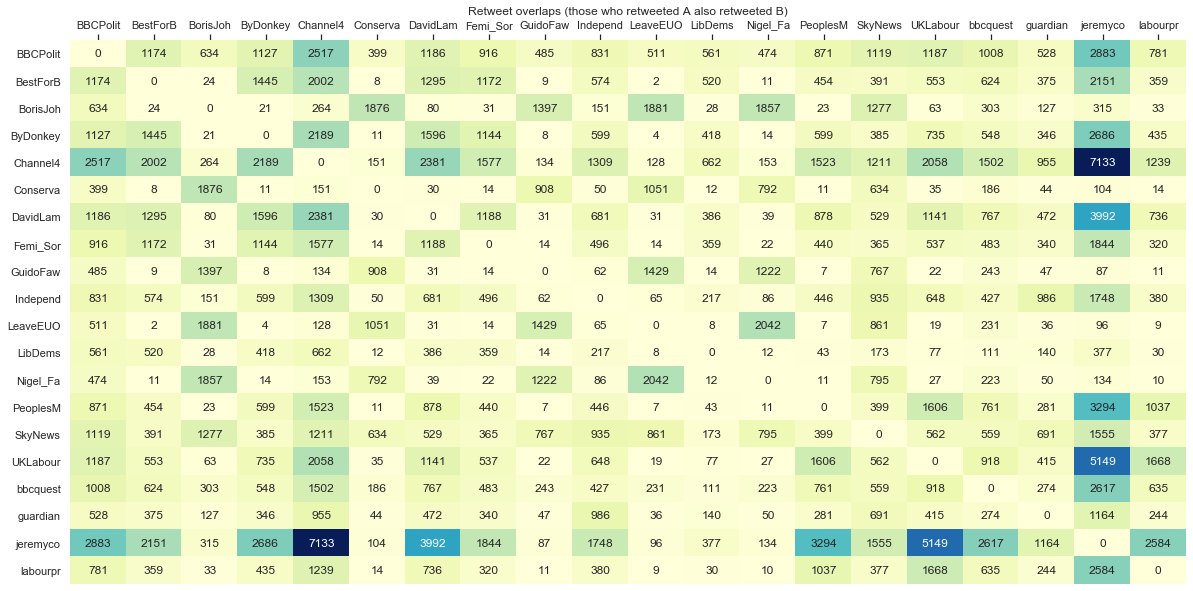

In [30]:
# Print a heatmap of retweet overlaps
mapping = rsn_sn
overlaps = get_mapping_overlaps(mapping, 0, 20)
hm_labels = []
hm_items = []
hm_data = []
for label, oc in sorted(overlaps.items()):
    hm_labels.append(label[:8])
    hm_items.append(label)
for item in hm_items:
    row = [c for x, c in sorted(overlaps[item].items())]
    hm_data.append(row)
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
hm = np.array(hm_data)
plt.figure()
ax = sns.heatmap(hm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=hm_labels, yticklabels=hm_labels)
ax.xaxis.set_ticks_position('top')
ax.set_title("Retweet overlaps (those who retweeted A also retweeted B)")

Text(0.5, 1, 'Hashtag overlaps (those who used hashtag A also used hashtag B)')

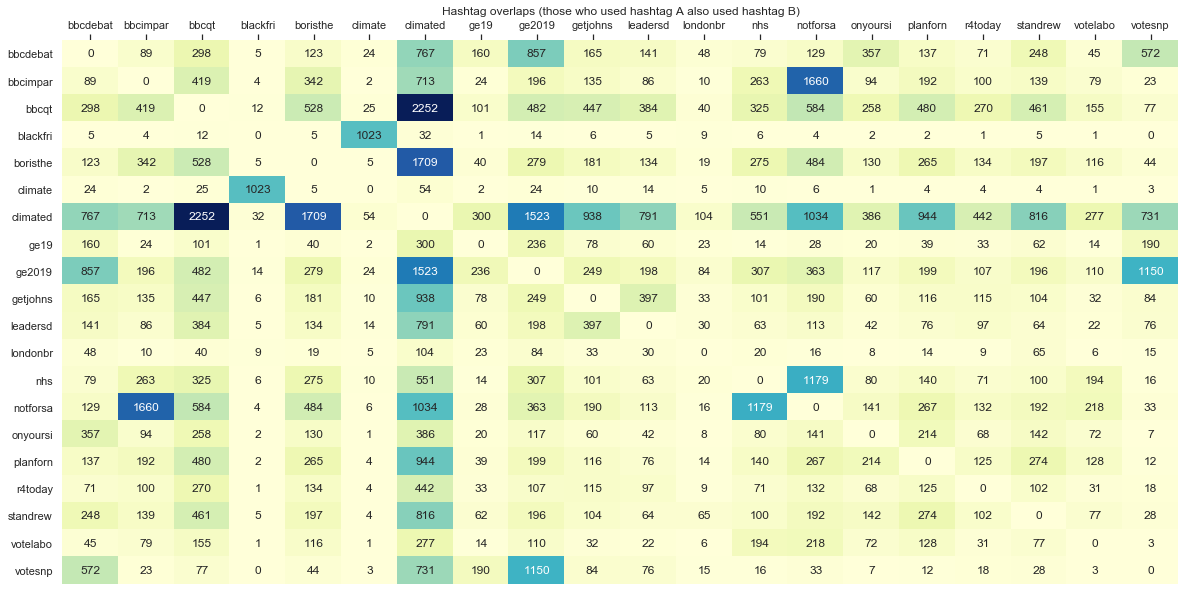

In [31]:
# Print a heatmap of cluster overlaps
mapping = hashtag_sn
overlaps = get_mapping_overlaps(mapping, 0, 20)
hm_labels = []
hm_items = []
hm_data = []
for label, oc in sorted(overlaps.items()):
    hm_labels.append(label[:8])
    hm_items.append(label)
for item in hm_items:
    row = [c for x, c in sorted(overlaps[item].items())]
    hm_data.append(row)
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
hm = np.array(hm_data)
plt.figure()
ax = sns.heatmap(hm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=hm_labels, yticklabels=hm_labels)
ax.xaxis.set_ticks_position('top')
ax.set_title("Hashtag overlaps (those who used hashtag A also used hashtag B)")

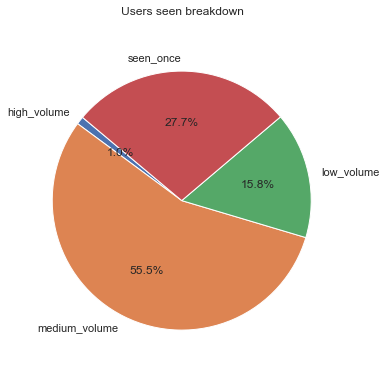

In [32]:
plot_data = categorize_users(counters["users"], timespan_d)
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Users seen breakdown')
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [33]:
if len(susp_ht_users) > 0:
    plot_data = categorize_users(susp_ht_users, timespan_d)
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes((0,0,.5,1))
    ax.set_title('Suspicious hashtag users')
    plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()

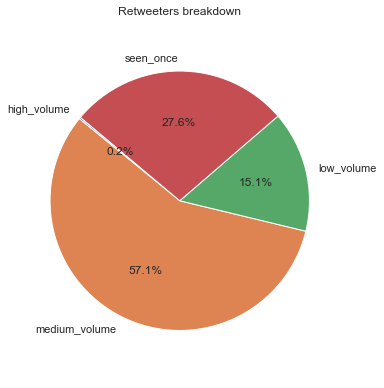

In [34]:
plot_data = categorize_users(counters["retweeters"], timespan_d)
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Retweeters breakdown')
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

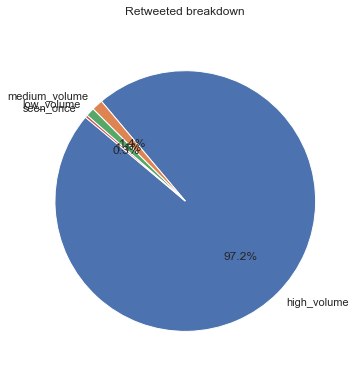

In [35]:
plot_data = categorize_users(counters["retweeted"], timespan_d)
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Retweeted breakdown')
plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

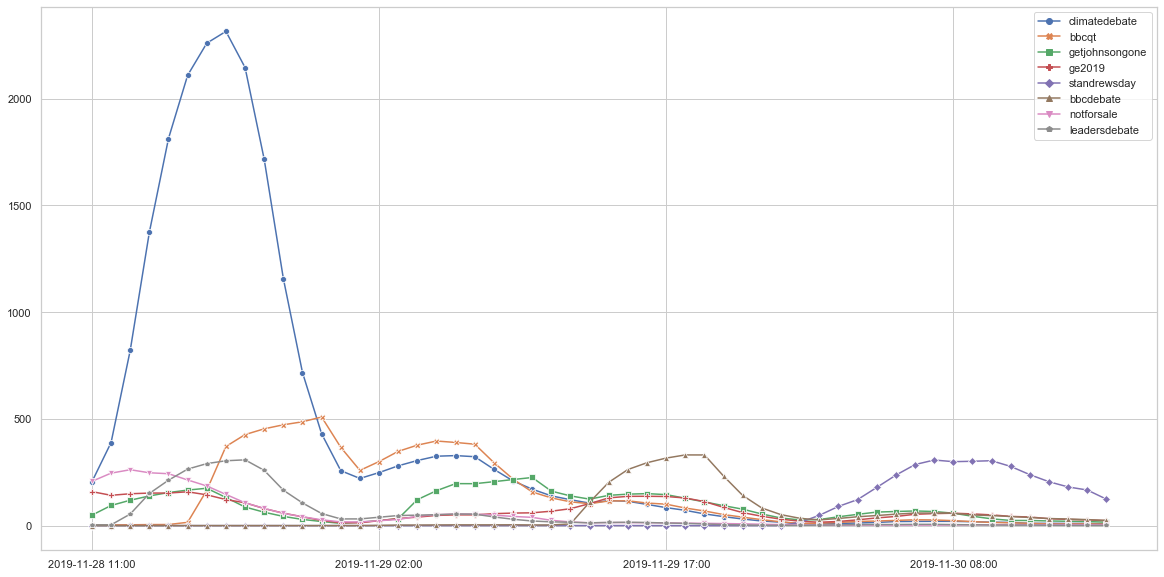

In [36]:
# Print activity comparison for some hashtags
offset=0
max_lines = 8
all_x_labels = get_timestamp_range(collect_start, collect_end)
if len(all_x_labels) > 20:
    targets = [x for x, c in counters["hashtags"].most_common()][offset:]
    all_plots = []
    labels = []
    for target in targets:
        if len(labels) >= max_lines:
            break
        if target in full["hashtag_ts_data"]:
            labels.append(target)
            plot_data = full["hashtag_ts_data"][target]
            counts = plot_data["count"]
            times = plot_data["time"]
            tc = {}
            for i, t in enumerate(times):
                tc[t] = counts[i]
            fitted = []
            for ts in all_x_labels:
                if ts in tc:
                    fitted.append(tc[ts])
                else:
                    fitted.append(0)
            all_plots.append(fitted)
    sns.set(style="whitegrid")
    x_labels = np.array(all_x_labels).T
    dates = x_labels
    values = np.array(all_plots).T
    data = pd.DataFrame(values, dates, columns=labels)
    data = data.rolling(7).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=True, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [37]:
# Print activity comparison for suspicious hashtags
offset=0
max_lines = 8
all_x_labels = get_timestamp_range(collect_start, collect_end)
if len(all_x_labels) > 20:
    targets = susp_hashtags
    all_plots = []
    labels = []
    if len(targets) > 0:
        for target in targets:
            if len(labels) >= max_lines:
                break
            if target in full["hashtag_ts_data"]:
                labels.append(target)
                plot_data = full["hashtag_ts_data"][target]
                counts = plot_data["count"]
                times = plot_data["time"]
                tc = {}
                for i, t in enumerate(times):
                    tc[t] = counts[i]
                fitted = []
                for ts in all_x_labels:
                    if ts in tc:
                        fitted.append(tc[ts])
                    else:
                        fitted.append(0)
                all_plots.append(fitted)
        sns.set(style="whitegrid")
        x_labels = np.array(all_x_labels).T
        dates = x_labels
        values = np.array(all_plots).T
        data = pd.DataFrame(values, dates, columns=labels)
        data = data.rolling(7).mean()
        ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=True, linewidth=1.5)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [38]:
targets = [x for x, c in counters["hashtags"].most_common(num_plots*2)][1:]
min_r = 5
dc = ""
for ht_target in targets:
    msg = "Users that amplified hashtag: #" + ht_target
    msg += " that used the hashtag at least " + str(min_r) + " times"
    if len(dc) > 0:
        msg += " and whose account was created after " + dc
    msg += "."
    print(msg)
    amps = print_hashtag_amplifiers(ht_target, full,  min_r, dc)
    print("")

Users that amplified hashtag: #bbcqt that used the hashtag at least 5 times.
User                                            | sc    | fl    | fr    |egg|  ca        | name
https://twitter.com/AndyMcDonaldMP	(5)	| 4 k	| 34 k	| 1 k	|   | 2012-11-05 | Andy McDonald
https://twitter.com/Celticanz		(7)	| 28 k	| 4 k	| 3 k	|   | 2017-05-30 | Mr Celtic 🇪🇺🎮👽🏳️‍🌈 #StopBrexit #LiarLiar
https://twitter.com/bbcquestiontime	(17)	| 21 k	| 535 k	| 604	|   | 2009-02-12 | BBC Question Time
https://twitter.com/LindaHurrell	(10)	| 134 k	| 923	| 207	|   | 2011-09-21 | Linda Hurrell
https://twitter.com/TheLastPersont2	(16)	| 30 k	| 2 k	| 2 k	|   | 2018-01-14 | The Last Girly Swots to join Tw❄️tter!
https://twitter.com/BENEFITS_NEWS	(5)	| 320 k	| 17 k	| 9 k	|   | 2016-01-30 | BENEFITS NEWS
https://twitter.com/Joe19705		(10)	| 807	| 3 	| 5 	|   | 2019-06-11 | Joe1970
https://twitter.com/BremainInSpain	(5)	| 92 k	| 18 k	| 14 k	|   | 2016-10-30 | BremainInSpain #FBPE
https://twitter.com/jjdubit		(7)	| 46 k	| 1 


Users that amplified hashtag: #leadersdebate that used the hashtag at least 5 times.
User                                            | sc    | fl    | fr    |egg|  ca        | name
https://twitter.com/sturdyAlex		(5)	| 161 k	| 91 k	| 1 k	|   | 2009-05-25 | Alex Andreou
https://twitter.com/MaureenPickeri5	(5)	| 20 k	| 99 	| 187	|   | 2019-09-02 | Maureen Pickering

Users that amplified hashtag: #boristhecoward that used the hashtag at least 5 times.
User                                            | sc    | fl    | fr    |egg|  ca        | name
https://twitter.com/CthuluShostako1	(5)	| 146	| 2 	| 5 	|   | 2019-09-27 | Cthulu-Shostakovich
https://twitter.com/MrBazza		(14)	| 7 k	| 11 k	| 10 k	|   | 2009-07-11 | Baz's BOXING Bible 🥊📖
https://twitter.com/DeepsShetty		(6)	| 12 k	| 667	| 1 k	|   | 2009-05-27 | Deepa Shetty #GetBrexitGone 🇬🇧 🇪🇺
https://twitter.com/MikeDeadman3	(5)	| 1 k	| 149	| 370	|   | 2019-11-12 | Mike Deadman
https://twitter.com/NDS691		(5)	| 14 k	| 1 k	| 3 k	|   | 2016-06

In [39]:
targets = susp_hashtags
min_r = 5
dc = ""
for ht_target in targets:
    msg = "Users that amplified hashtag: #" + ht_target
    msg += " that used the hashtag at least " + str(min_r) + " times"
    if len(dc) > 0:
        msg += " and whose account was created after " + dc
    msg += "."
    print(msg)
    amps = print_hashtag_amplifiers(ht_target, full,  min_retweets=min_r, date_cutoff=dc)
    print("")

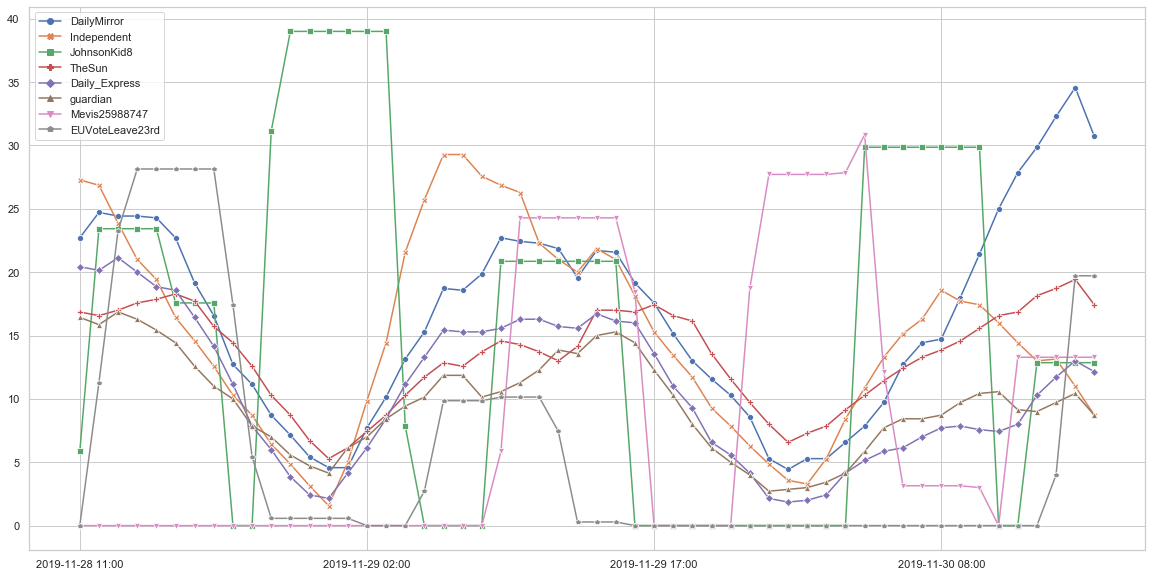

In [40]:
# Print activity comparison for some users
offset=0
max_lines = 8
all_x_labels = get_timestamp_range(collect_start, collect_end)
if len(all_x_labels) > 20:
    targets = [x for x, c in counters["users"].most_common()][offset:]
    all_plots = []
    labels = []
    for target in targets:
        if len(labels) >= max_lines:
            break
        if target in full["sn_ts_data"]:
            labels.append(target)
            plot_data = full["sn_ts_data"][target]
            counts = plot_data["count"]
            times = plot_data["time"]
            tc = {}
            for i, t in enumerate(times):
                tc[t] = counts[i]
            fitted = []
            for ts in all_x_labels:
                if ts in tc:
                    fitted.append(tc[ts])
                else:
                    fitted.append(0)
            all_plots.append(fitted)
    if len(labels) > 0:
        sns.set(style="whitegrid")
        x_labels = np.array(all_x_labels).T
        dates = x_labels
        values = np.array(all_plots).T
        data = pd.DataFrame(values, dates, columns=labels)
        data = data.rolling(7).mean()
        ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=True, linewidth=1.5)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [41]:
# Print activity comparison for some users
offset=0
max_lines = 8
all_x_labels = get_timestamp_range(collect_start, collect_end)
if len(all_x_labels) > 20:
    targets = [x for x, c in susp_ht_users.most_common()][offset:]
    all_plots = []
    labels = []
    for target in targets:
        if len(labels) >= max_lines:
            break
        if target in full["sn_ts_data"]:
            labels.append(target)
            plot_data = full["sn_ts_data"][target]
            counts = plot_data["count"]
            times = plot_data["time"]
            tc = {}
            for i, t in enumerate(times):
                tc[t] = counts[i]
            fitted = []
            for ts in all_x_labels:
                if ts in tc:
                    fitted.append(tc[ts])
                else:
                    fitted.append(0)
            all_plots.append(fitted)
    if len(labels) > 0:
        sns.set(style="whitegrid")
        x_labels = np.array(all_x_labels).T
        dates = x_labels
        values = np.array(all_plots).T
        data = pd.DataFrame(values, dates, columns=labels)
        data = data.rolling(7).mean()
        ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=True, linewidth=1.5)
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))

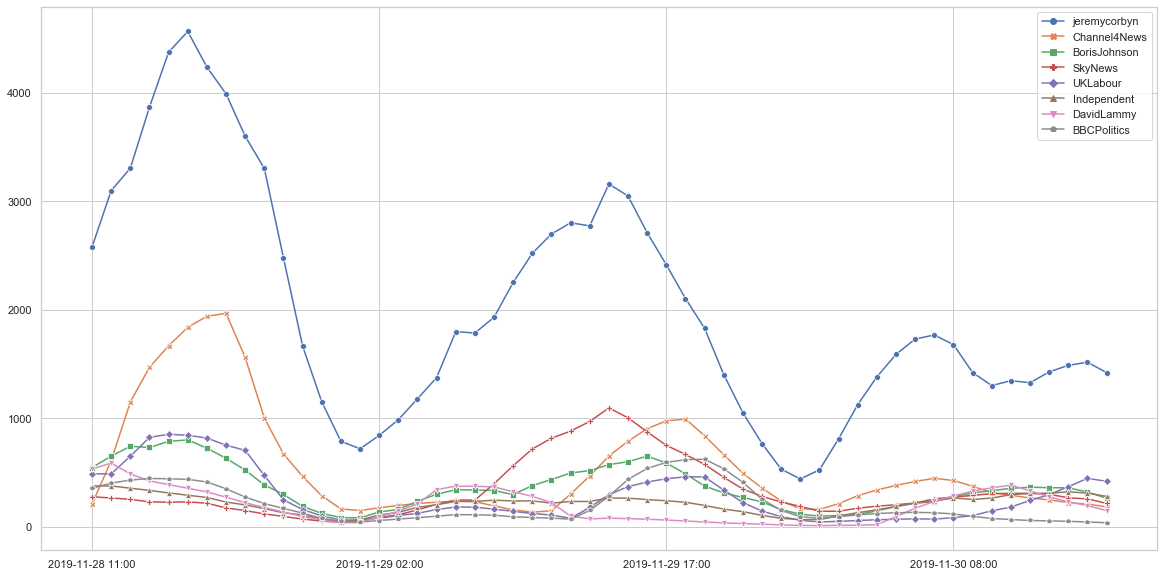

In [42]:
# Print retweet activity comparison for some accounts
offset=0
max_lines = 8
all_x_labels = get_timestamp_range(collect_start, collect_end)
if len(all_x_labels) > 20:
    targets = [x for x, c in counters["retweeted"].most_common()][offset:]
    all_plots = []
    labels = []
    for target in targets:
        if len(labels) >= max_lines:
            break
        if target in full["rsn_ts_data"]:
            labels.append(target)
            plot_data = full["rsn_ts_data"][target]
            counts = plot_data["count"]
            times = plot_data["time"]
            tc = {}
            for i, t in enumerate(times):
                tc[t] = counts[i]
            fitted = []
            for ts in all_x_labels:
                if ts in tc:
                    fitted.append(tc[ts])
                else:
                    fitted.append(0)
            all_plots.append(fitted)
    sns.set(style="whitegrid")
    x_labels = np.array(all_x_labels).T
    dates = x_labels
    values = np.array(all_plots).T
    data = pd.DataFrame(values, dates, columns=labels)
    data = data.rolling(7).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=True, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

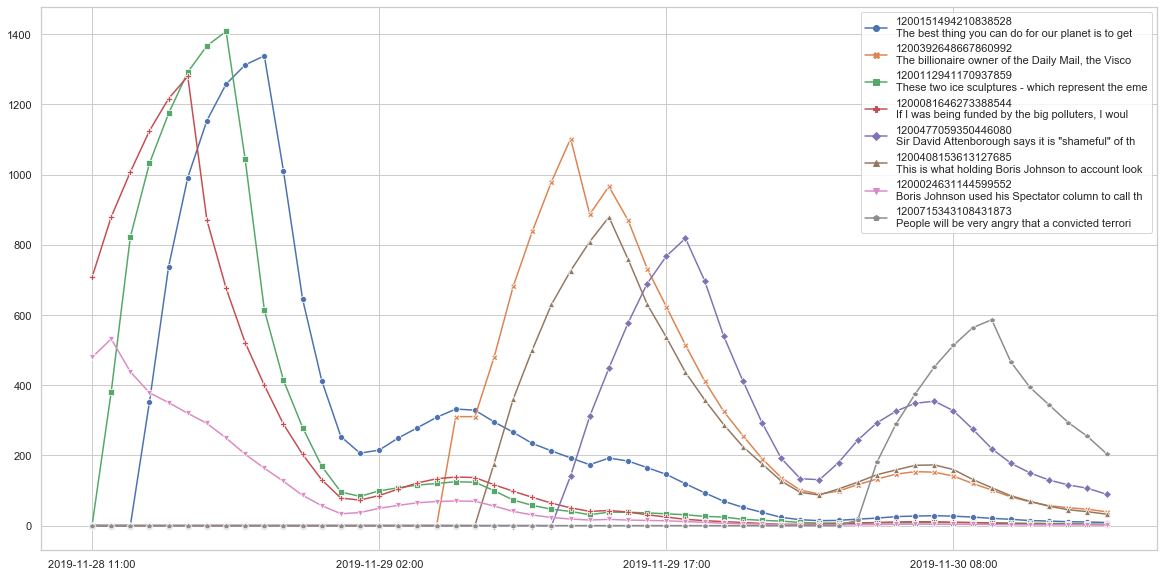

In [43]:
# Print activity comparison for some tweets
offset=0
max_lines = 8
all_x_labels = get_timestamp_range(collect_start, collect_end)
if len(all_x_labels) > 20:
    targets = [x for x, c in twid_count.most_common()][offset:]
    all_plots = []
    labels = []
    for target in targets:
        if len(labels) >= max_lines:
            break
        if target in full["rtwid_ts_data"]:
            tweet_text = twid_text[target].replace("\n", " ").replace("\r", " ")[:50]
            title = target + "\n" + tweet_text
            labels.append(title)
            plot_data = full["rtwid_ts_data"][target]
            counts = plot_data["count"]
            times = plot_data["time"]
            tc = {}
            for i, t in enumerate(times):
                tc[t] = counts[i]
            fitted = []
            for ts in all_x_labels:
                if ts in tc:
                    fitted.append(tc[ts])
                else:
                    fitted.append(0)
            all_plots.append(fitted)
    sns.set(style="whitegrid")
    x_labels = np.array(all_x_labels).T
    dates = x_labels
    values = np.array(all_plots).T
    data = pd.DataFrame(values, dates, columns=labels)
    data = data.rolling(7).mean()
    ax = sns.lineplot(data=data, hue="event", style="event", dashes=False, markers=True, linewidth=1.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

In [44]:
# This prints the top n tweets seen in the data set (by the number of times we saw them shared)
print_tweet_texts(twid_count, twid_text, twid_url, num_counters)

14179	The best thing you can do for our planet is to get Boris Johnson out of Number 10.	https://twitter.com/jeremycorbyn/status/1200151494210838528	[1200151494210838528]
12405	The billionaire owner of the Daily Mail, the Viscount Rothermere, has bought @theipaper. Two billionaire press ba… https://t.co/wybCI9PMm9	https://twitter.com/jeremycorbyn/status/1200392648667860992	[1200392648667860992]
11617	These two ice sculptures - which represent the emergency on planet earth - will take the place of Boris Johnson and… https://t.co/cF7B6AANhT	https://twitter.com/Channel4News/status/1200112941170937859	[1200112941170937859]
11441	If I was being funded by the big polluters, I wouldn't want to take part in the climate debate either, @BorisJohnson.	https://twitter.com/jeremycorbyn/status/1200081646273388544	[1200081646273388544]
9687	Sir David Attenborough says it is "shameful" of the Prime Minister not to attend last night's climate change debate… https://t.co/GdnqyOYxwd	https://twitter.com/C

In [45]:
for twid, count in twid_count.most_common(20):
    url = twid_url[twid]
    tw = Tweet(url)
    display(tw)

In [46]:
print("Most amplified accounts in the dataset.")
amps = print_most_amplified(full, high_vol, include_verified=True)

Most amplified accounts in the dataset.
User                                    rtc - rtn       | sc    | fl    | fr    |egg|  ca     | summary
https://twitter.com/MirrorBreaking_	(145 - 103)	| 7 k	| 15 k	| 21 	|   | 2018-04-03 | []
https://twitter.com/Plaid_Cymru		(1938 - 788)	| 43 k	| 45 k	| 8 k	|   | 2008-04-16 | []
https://twitter.com/KayBurley		(797 - 748)	| 69 k	| 450 k	| 268	|   | 2013-03-25 | [generic]
https://twitter.com/LabourByTheMany	(109 - 108)	| 826	| 7 k	| 288	|   | 2019-02-28 | [labour]
https://twitter.com/SkyNews		(19622 - 13232)	| 366 k	| 5288 k	| 27 	|   | 2007-07-19 | []
https://twitter.com/JakubKrupa		(123 - 123)	| 85 k	| 21 k	| 10 k	|   | 2010-03-28 | [brexit]
https://twitter.com/tomfrench85		(218 - 119)	| 25 k	| 9 k	| 3 k	|   | 2010-05-26 | []
https://twitter.com/michaelgove		(108 - 108)	| 5 k	| 138 k	| 1 k	|   | 2016-06-30 | []
https://twitter.com/Nigel_Farage	(11521 - 8716)	| 15 k	| 1455 k	| 477	|   | 2009-01-15 | [brexit]
https://twitter.com/LeaveEUOfficial	(1

**Clustering**

In [47]:
# This partitions the accounts into communities
# it requires python-igraph
# Note you can use sn_rsn, sn_rep, or sn_men
# Depending on what you're looking for
clusters = get_communities(sn_rsn)
mapping = []
for source, targets in sn_rsn.items():
    for target, count in targets.items():
        mapping.append((source, target, count))
node_attr = {}
for label, names in clusters.items():
    for name in names:
        node_attr[name] = [label]
write_gexf(mapping, os.path.join(dirname, "retweet_graph.gexf"), node_attr, ["community"])

In [48]:
# Here I just print out some of the most prominent
# accounts in each cluster
threshold = high_vol
mon_in_cluster = {}
cluster_len = {}
cluster_retweets = {}
for index, names in clusters.items():
    if len(names) > 10:
        cluster_len[index] = len(names)
    top = set()
    for x, c in counters["retweeted"].most_common():
        if c > 0:
            if x in names:
                top.add(x)
            if len(top) > 10:
                break
    rtc = 0
    for n in names:
        if n in rsn_sn:
            for sn, count in rsn_sn[n].most_common():
                rtc += count
    cluster_retweets[index] = rtc
    if len(top) > 0:
        mon_in_cluster[index] = top
summary = Counter()
cluster_names = {}
for index, count in cluster_len.items():
    names = []
    if index in mon_in_cluster:
        names = mon_in_cluster[index]
    print("")
    msg = "Cluster: " + str(index)
    msg += " [Members: " + str(count) + ", Retweet count: " + str(cluster_retweets[index]) + "]"
    print(msg)
    members = Counter()
    for n in names:
        rtc = 0
        if n in rsn_sn:
            for s, c in rsn_sn[n].items():
                rtc += c
        flag = ""
        if rtc > threshold:
            summary[n] = rtc
        print(flag + "https://twitter.com/" + n + "\t(" + str(rtc) + ")")
        members[n] = rtc
    if len(members) > 0:
        top_member, top_count = members.most_common(1)[0]
        cluster_names[index] = top_member


Cluster: 0 [Members: 1723, Retweet count: 4665]
https://twitter.com/theamycoop	(16)
https://twitter.com/fleetstreetfox	(185)
https://twitter.com/MayorofLondon	(15)
https://twitter.com/rachaelvenables	(51)
https://twitter.com/KayBurley	(797)
https://twitter.com/LBCNews	(80)
https://twitter.com/EJWardNews	(12)
https://twitter.com/MatthewStadlen	(16)
https://twitter.com/LBC	(3394)
https://twitter.com/JudithMoritz	(33)
https://twitter.com/DJack_Journo	(11)

Cluster: 1 [Members: 21718, Retweet count: 55123]
https://twitter.com/BestForBritain	(9302)
https://twitter.com/HinduMonkey	(120)
https://twitter.com/ByDonkeys	(11215)
https://twitter.com/Peston	(3260)
https://twitter.com/LibDems	(6111)
https://twitter.com/mattuthompson	(90)
https://twitter.com/JakubKrupa	(123)
https://twitter.com/DavidLammy	(12534)
https://twitter.com/joswinson	(4292)
https://twitter.com/Hugodixon	(107)
https://twitter.com/Femi_Sorry	(7050)

Cluster: 2 [Members: 46793, Retweet count: 118694]
https://twitter.com/jeremy

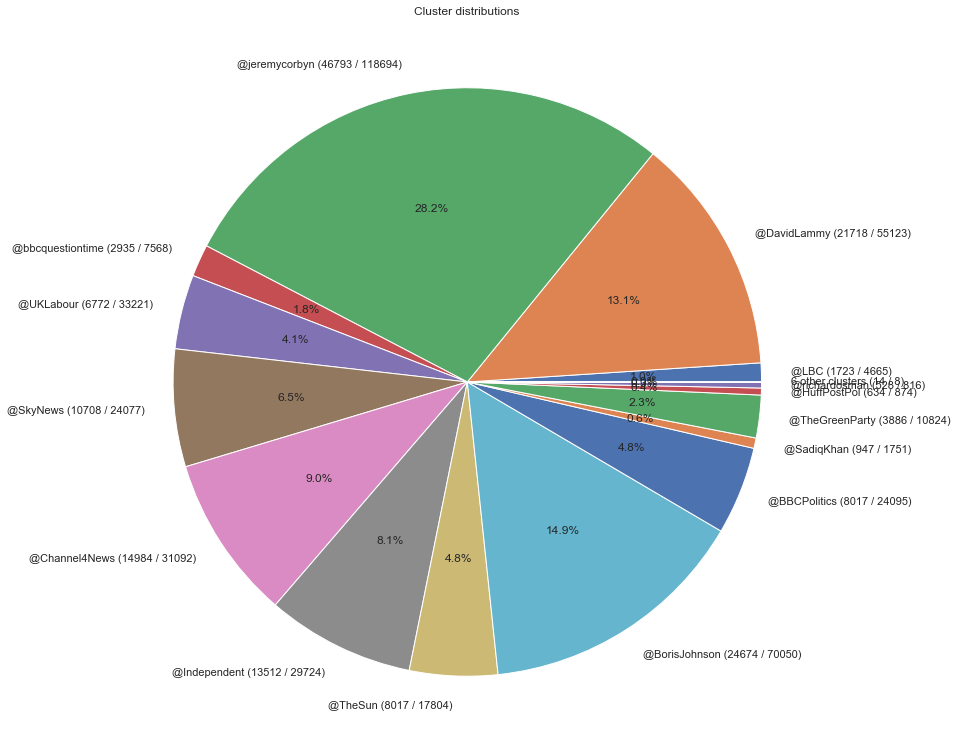

In [53]:
# A pie chart of the cluster sizes. Labels are derived in the
# previous step (the most retweeted account in the cluster)
labels = []
sizes = []
node_count = sum([len(c) for x, c in clusters.items()])
num_clusters = len(clusters)
other = 0
other_c = 0
other_rtc = 0
named_clusters = set()
named_cluster_c = Counter()
for x, c in sorted(clusters.items()):
    if x in cluster_names:
        named_clusters.add(x)
        named_cluster_c[x] = cluster_retweets[x]
        nc = len(c)
        labels.append("@"+cluster_names[x] + " (" + str(nc) + " / " + str(cluster_retweets[x]) + ")")
        sizes.append(len(c))
    else:
        other_c += 1
        other_rtc += cluster_retweets[x]
        other += len(c)
if other_c > 0:
    labels.append( str(other_c) + " other clusters (" + str(other) + " / " + str(other_rtc) + ")")
    sizes.append(other)
fig = plt.figure(figsize=(18,10))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Cluster distributions')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

In [50]:
# Print a heatmap of cluster overlaps
top_named_clusters = set([x for x, c in named_cluster_c.most_common(20)])
overlaps = get_cluster_overlaps_partial(clusters, sn_rsn, top_named_clusters)
hm_labels = []
hm_indices = []
hm_data = []
for label, oc in sorted(overlaps.items()):
    hm_labels.append(cluster_names[label][:8])
    hm_indices.append(label)   
for index in hm_indices:
    row = [c for x, c in sorted(overlaps[index].items())]
    hm_data.append(row)
sns.set(rc={'figure.figsize':(20,10)})
sns.set(style="whitegrid")
hm = np.array(hm_data)
plt.figure()
ax = sns.heatmap(hm, annot=True, fmt="d", cmap="YlGnBu", cbar=False, xticklabels=hm_labels, yticklabels=hm_labels)
ax.xaxis.set_ticks_position('top')
ax.set_title("Cluster overlaps (top 20 clusters)")

KeyboardInterrupt: 

In [ ]:
print("Found " + str(len(summary)) + " influencers from clustering.")
print_sn_counter(summary, len(summary))

In [ ]:
top_summary = [x for x, c in summary.most_common()]
for target in top_summary[:5]:
    print("")
    print("Full analysis for account: " + target)
    print("=====================================")
    print("")
    # Find the cluster that includes _target_ account
    selected_cluster = get_cluster_for_sn(target, clusters)
    print("There were " + str(len(selected_cluster)) + " accounts in the cluster with " + target)

    # Get details of all accounts in that cluster
    cluster_details = []
    for sn in selected_cluster:
        if sn in sn_details:
            cluster_details.append(sn_details[sn])
    print("Found details for " + str(len(cluster_details)) + " accounts.")

    # Save those userids and details
    if save_data == True:
        # Get the userids of those users if the accounts are
        # not verified or protected
        cluster_ids = set()
        for d in cluster_details:
            valid = True
            if d["protected"] == True:
                valid = False
            if d["verified"] == True:
                valid = False
            if valid == True:
                cluster_ids.add(d["id_str"])
        print("Retrieved " + str(len(cluster_ids)) + " IDs from data.")
        print("")
        with open(os.path.join(dirname, "ids_cluster_" + target + ".txt"), "w") as f:
            for id_str in cluster_ids:
                f.write(id_str+"\n")
        save_json(list(cluster_ids), os.path.join(dirname, "cluster_" + target + ".json"))
        save_json(cluster_details, os.path.join(dirname, "details_cluster_" + target + ".json"))
    
    # Show account age distribution
    cluster_acct_ages = Counter()
    for d in cluster_details:
        if "created_at" in d:
            ca = d["created_at"]
            yr = ca[-4:]
            mon = md[ca[4:7]]
            q = ""
            for qname, qvals in quarters.items():
                if int(mon) in qvals:
                    q = qname
            day = ca[8:10]
            ds = str(yr) + "-" + q
            cluster_acct_ages[ds] += 1
    plot_data = {}
    plot_data["labels"] = []
    plot_data["counts"] = []
    for label, count in sorted(cluster_acct_ages.items(), reverse=True):
        plot_data["labels"].append(label)
        plot_data["counts"].append(count)
    plot_data = trim_plot_data(plot_data, 0, 50)
    height = len(plot_data["counts"])/3
    sns.set(rc={'figure.figsize':(20,height)})
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18,10))
    ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
    for i, v in enumerate(plot_data["counts"]):
        pad = min(1.0, v/100)
        ax.text(v+pad, i+0.25, str(v), fontweight='bold')
    ax.set_title("Account ages in cluster: " + target)
    
    # Show some hashtags used by the cluster
    cluster_hts = Counter()
    sn_hashtag = full["sn_hashtag"]
    for sn in selected_cluster:
        if sn in sn_hashtag:
            for ht, c in sn_hashtag[sn].items():
                cluster_hts[ht] += c

    plot_data = {}
    plot_data["labels"] = []
    plot_data["sizes"] = []

    n = 30
    other = 0
    otherc = 0
    for ht, c in cluster_hts.most_common():
        if len(plot_data["labels"]) <= n:
            plot_data["labels"].append("#" + ht)
            plot_data["sizes"].append(c)
        else:
            otherc += 1
            other += c
    plot_data["labels"].append("Other (" + str(other) + ")")
    plot_data["sizes"].append(other)

    fig = plt.figure(figsize=(12,7))
    ax = fig.add_axes((0,0,.5,1))
    ax.set_title(target + ' cluster hashtag breakdown')
    plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
    plt.axis('equal')
    plt.show()
    
    cluster_snc = Counter()
    users = counters["users"]
    for sn in selected_cluster:
        if sn in users:
            cluster_snc[sn] = users[sn]
    plot_data = categorize_users(cluster_snc, timespan_d)
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes((0,0,.5,1))
    ax.set_title(target + ' retweet breakdown')
    plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()
    
    # Show some tweets published by the cluster
    print("")
    print("Top tweets published by cluster including: " + target)
    print("==================================================")
    print("")
    twidc = Counter()
    sn_twid = full["sn_twid"]
    for sn in selected_cluster:
        if sn in sn_twid:
            for twid, c in sn_twid[sn].items():
                twidc[twid] += c
    for twid, count in twidc.most_common(10):
        url = twid_url[twid]
        text = twid_text[twid]
        print(str(count) + "\t" + url + "\t[" + twid + "]")
        display(Tweet(url))
    print("")
    
    print("")
    print("Top URLs published by cluster including: " + target)
    print("==================================================")
    print("")
    # Show some urls published by the cluster
    urlc = Counter()
    sn_url = full["sn_url"]
    for sn in selected_cluster:
        if sn in sn_url:
            for url, c in sn_url[sn].items():
                urlc[url] += c
    print_counter(urlc, num_counters)
    print("")
    
    print("")
    print("Accounts retweeted by cluster including: " + target)
    print("==================================================")
    print("")
    clrtw = Counter()
    for sn in selected_cluster:
        if sn in sn_rsn:
            for x, c in sn_rsn[sn].items():
                clrtw[x] += c
    print_sn_counter(clrtw, num_counters)
    print("")
    
    # Get details for the list of users that retweeted _target_
    print("")
    print("Retweet analysis for target: " + target)
    print("=========================================")
    print("")
    rtw = rsn_sn[target]
    rlist = [x for x, c in rtw.items()]
    print("Found  " + str(len(rlist)) + " accounts that retweeted " + target)

    rdetails = []
    for sn in rlist:
        if sn in sn_details:
            rdetails.append(sn_details[sn])
    print("Found details for " + str(len(rdetails)) + " accounts.")

    # Save those userids and details
    if save_data == True:
        # Get the userids of those users if the accounts are
        # not verified or protected
        relids = set()
        for d in rdetails:
            valid = True
            if d["protected"] == True:
                valid = False
            if d["verified"] == True:
                valid = False
            if valid == True:
                relids.add(d["id_str"])
        print("Retrieved " + str(len(relids)) + " IDs from data.")
        with open(os.path.join(dirname, "ids_retweeted_" + target + ".txt"), "w") as f:
            for id_str in relids:
                f.write(id_str+"\n")
        save_json(list(relids), os.path.join(dirname, "retweeted_" + target + ".json"))
        save_json(rdetails, os.path.join(dirname, "details_retweeted_" + target + ".json"))
    
    plot_data = categorize_users(rsn_sn[target], timespan_d)
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes((0,0,.5,1))
    ax.set_title(target + ' retweet breakdown')
    plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.show()
    
    rt_hts = Counter()
    sn_hashtag = full["sn_hashtag"]
    for sn in rlist:
        if sn in sn_hashtag:
            for ht, c in sn_hashtag[sn].items():
                cluster_hts[ht] += c

    plot_data = {}
    plot_data["labels"] = []
    plot_data["sizes"] = []

    n = 30
    other = 0
    otherc = 0
    for ht, c in cluster_hts.most_common():
        if len(plot_data["labels"]) <= n:
            plot_data["labels"].append("#" + ht)
            plot_data["sizes"].append(c)
        else:
            otherc += 1
            other += c
    plot_data["labels"].append("Other (" + str(other) + ")")
    plot_data["sizes"].append(other)

    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes((0,0,.5,1))
    ax.set_title(target + ' rewteeters hashtag breakdown')
    plt.pie(plot_data["sizes"], labels=plot_data["labels"], autopct='%1.1f%%', startangle=0)
    plt.axis('equal')
    plt.show()
    
    # Show account age distribution
    cluster_acct_ages = Counter()
    for d in rdetails:
        if "created_at" in d:
            ca = d["created_at"]
            yr = ca[-4:]
            mon = md[ca[4:7]]
            q = ""
            for qname, qvals in quarters.items():
                if int(mon) in qvals:
                    q = qname
            day = ca[8:10]
            ds = str(yr) + "-" + q
            cluster_acct_ages[ds] += 1
    plot_data = {}
    plot_data["labels"] = []
    plot_data["counts"] = []
    for label, count in sorted(cluster_acct_ages.items(), reverse=True):
        plot_data["labels"].append(label)
        plot_data["counts"].append(count)
    plot_data = trim_plot_data(plot_data, 0, 50)
    height = len(plot_data["counts"])/3
    sns.set(rc={'figure.figsize':(20,height)})
    sns.set(style="whitegrid")
    fig = plt.figure(figsize=(18,10))
    ax = sns.barplot(x="counts", y="labels", palette="husl", data=plot_data)
    for i, v in enumerate(plot_data["counts"]):
        pad = min(1.0, v/100)
        ax.text(v+pad, i+0.25, str(v), fontweight='bold')
    ax.set_title("Ages of accounts that retweeted: " + target)
    plt.show()

    
    print("")
    print("Accounts retweeted by accounts that retweeted: " + target)
    print("==================================================")
    print("")
    rrtw = Counter()
    for sn in rlist:
        if sn in sn_rsn:
            for x, c in sn_rsn[sn].items():
                rrtw[x] += c
    print_sn_counter(rrtw, num_counters)
    print("")   
    
    # Show some tweets published by retweeters of target
    print("")
    print("Top tweets published by retweeters of: " + target)
    print("==================================================")
    print("")
    twidc = Counter()
    sn_twid = full["sn_twid"]
    for sn in rlist:
        if sn in sn_twid:
            for twid, c in sn_twid[sn].items():
                twidc[twid] += c
    for twid, count in twidc.most_common(10):
        url = twid_url[twid]
        text = twid_text[twid]
        print(str(count) + "\t" + url + "\t[" + twid + "]")
        display(Tweet(url))
    
    # Show some urls published by the retweeters of target
    print("")
    print("URLs published by retweeters of: " + target)
    print("==================================================")
    print("")
    urlc = Counter()
    sn_url = full["sn_url"]
    for sn in rlist:
        if sn in sn_url:
            for url, c in sn_url[sn].items():
                urlc[url] += c
    print_counter(urlc, num_counters)
    
    print("")
    min_r = 5
    dc = ""
    msg = "Users that retweeted " + target + " (" + str(len(rsn_sn[target])) + ")"
    msg += " at least " + str(min_r) + " times"
    if len(dc) > 0:
        msg += " and whose account was created after " + dc
    msg += "."
    print(msg)
    amps = print_target_amplifiers(target, full, min_retweets=min_r, date_cutoff=dc)